In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import beta
sns.set(style='whitegrid', font_scale=1.6)

%matplotlib inline

In [2]:
def PlotForPeriod(period_num):
    GetAverageInfo(period_num)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(range(6), average_rice, color = 'red', linewidth = 10, label = 'average_rice')
    ax.scatter(range(6), average_meat, color = 'blue', linewidth = 10, label = "average_meat")  
    ax.set_title(label = 'Period № {0}'.format(period_num))
    ax.set_ylabel(ylabel = 'Price')
    plt.legend()
    plt.plot()

In [3]:
def GetInfo(df, num, giffen_with_real, info_type):
    person_data = df.loc[(df['participant.id_in_session'] == player)]
    period = df['subsession.round_number'].values
    amount_rice = df['player.x_rice'].values
    amount_meat = df['player.x_meat'].values
    utility = df['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = df['player.x_rice_actual'].values
        
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    #ax.plot(period, utility,color = 'red', linewidth = 3, label = 'utility')
    
    if giffen_with_real > 0:
        ax.plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax.set_title(label = '{0} № {1}'.format(info_type, num))
    #ax.set_ylabel(ylabel = 'Price')
    plt.legend(loc = 1)
    plt.plot()

In [4]:
def GetAverageInfo(df, period_num):
    average_rice = df['player.x_rice'].mean()
    max_rice = df['player.max_rice'].mean()
    average_meat = df['player.x_meat'].mean()
    
    price_rice = df['group.p_rice'].mean()
    price_meat = df['group.p_meat'].mean()
    return average_rice, average_meat, price_rice, price_meat, max_rice

In [5]:
def PlotForPlayer(df, player, giffen_with_real):
    person_data = df.loc[(df['participant.id_in_session'] == player)]
    period = person_data['subsession.round_number'].values
    amount_rice = person_data['player.x_rice'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = person_data['player.x_rice_actual'].values
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(range(1, 15), [np.array(parts).mean()] * 14, ls = '--', label = 'Средняя доля')
    ax.plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    #ax.plot(period, utility,color = 'red', linewidth = 3, label = 'utility')
    
    if giffen_with_real > 0:
        ax.plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax.set_title(label = 'Player № {0}'.format(player))
    #ax.set_ylabel(ylabel = 'Price')
    plt.legend(loc = 1)
    plt.plot()

In [6]:
def PlotForGroups(df, player, giffen_with_real):
    person_data_even = df.loc[(df['participant.id_in_session']% 2 == 0)]
    person_data_odd = df.loc[(df['participant.id_in_session']% 2 == 1)]
    
    GetInfo(person_data_even, 1, 1, "Group")
    GetInfo(person_data_odd, 1, 2, "Group")

##  Гиффен 0

In [7]:
data = pd.read_excel('Data_0.xlsx', sheet_name = 0)
description = pd.read_excel('Data_0.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data = data[usefull_cols].copy()

In [8]:
g0_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                      'round_6', 'round_7'])
g0_overall_info.loc[0, 'label'] = 'Average_rice'
g0_overall_info.loc[1, 'label'] = 'Average_meat'
g0_overall_info.loc[2, 'label'] = 'Price_rice'
g0_overall_info.loc[3, 'label'] = 'Price_meat'
g0_overall_info.loc[4, 'label'] = short_data.iloc[0:23]['participant.label'].values
g0_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data = short_data.loc[(short_data['subsession.round_number'] == round_num)]

    g0_overall_info.iloc[0, round_num] = GetAverageInfo(period_data, round_num)[0] 
    g0_overall_info.iloc[1, round_num] = GetAverageInfo(period_data, round_num)[1] 
    g0_overall_info.iloc[2, round_num] = GetAverageInfo(period_data, round_num)[2] 
    g0_overall_info.iloc[3, round_num] = GetAverageInfo(period_data, round_num)[3]
    g0_overall_info.iloc[4, round_num] = period_data['player.payoff'].values
    g0_overall_info.iloc[5, round_num] = GetAverageInfo(period_data, round_num)[4]

[]

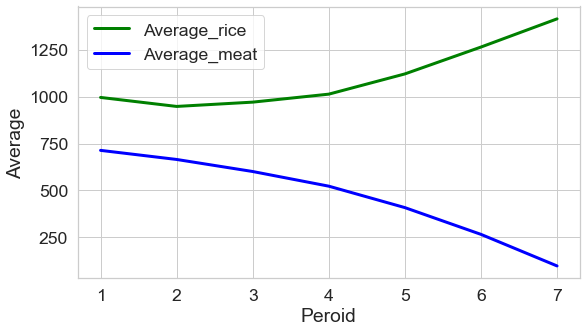

In [9]:
fig, ax = plt.subplots(1,figsize=(9, 5))

ax.plot(range(1, 8), g0_overall_info.iloc[0, 1:].values, color = 'green', linewidth = 3,  label = 'Average_rice')
ax.plot(range(1, 8), g0_overall_info.iloc[1, 1:].values, color = 'blue', linewidth = 3, label = 'Average_meat')

ax.set_ylabel(ylabel = 'Average')
ax.set_xlabel(xlabel = 'Peroid')

plt.legend()
plt.plot()


In [10]:
#fig, ax = plt.subplots(1, figsize=(9, 5))
#
#ax.plot(range(1, 8), overall_info.iloc[2, 1:].values, color = 'green', linewidth = 3, label = 'Price_rice')
#ax.plot(range(1, 8), overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
#
#ax.set_ylabel(ylabel = 'Price')
#ax.set_xlabel(xlabel = 'Peroid')
#
#plt.legend()
#plt.plot()

[]

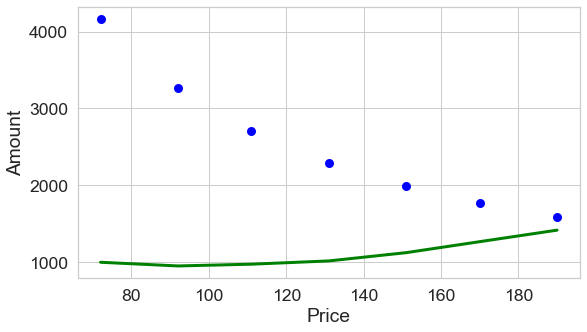

In [11]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g0_overall_info.iloc[2, 1:].values, g0_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
ax.scatter(g0_overall_info.iloc[2, 1:].values, g0_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

##   Гиффен 1

In [12]:
data1 = pd.read_excel('Data_1.xlsx', sheet_name = 0)
description1 = pd.read_excel('Data_1.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data1 = data1[usefull_cols].copy()

In [13]:
description1

Data  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0   participant.id_in_session         NaN         NaN         NaN   
1            participant.code         NaN         NaN         NaN   
2           participant.label         NaN         NaN         NaN   
3         participant._is_bot         NaN         NaN         NaN   
4          participant.payoff         NaN         NaN         NaN   
5          player.id_in_group         NaN         NaN         NaN   
6                 player.role         NaN         NaN         NaN   
7               player.payoff         NaN         NaN         NaN   
8               player.x_rice         NaN         NaN         NaN   
9             player.x_rice_d         NaN         NaN         NaN   
10       player.x_rice_actual         NaN         NaN         NaN   
11     player.x_rice_actual_d         NaN         NaN         NaN   
12              player.x_meat         NaN         NaN         NaN   
13            player.max_rice         NaN         NaN         NaN   
14             player.utility         NaN         NaN         NaN   
15           player.utility_d         NaN         NaN         NaN   
16              player.result         NaN         NaN         NaN   
17            player.result_d         NaN         NaN         NaN   
18     group.id_in_subsession         NaN         NaN         NaN   
19          group.n_players_0         NaN         NaN         NaN   
20          group.n_players_1         NaN         NaN         NaN   
21          group.rice_left_0         NaN         NaN         NaN   
22          group.rice_left_1         NaN         NaN         NaN   
23        group.rice_bought_0         NaN         NaN         NaN   
24        group.rice_bought_1         NaN         NaN         NaN   
25               group.p_meat         NaN         NaN         NaN   
26               group.p_rice         NaN         NaN         NaN   
27             group.p_rice_d         NaN         NaN         NaN   
28              group.eq_rice         NaN         NaN         NaN   

                        Таблица с общими результатами  
0                                        Номер игрока  
1                                                 NaN  
2                                                 NaN  
3                                                   -  
4                                       Общий выигрыш  
5                                Номер в общей группе  
6                                                   -  
7                   Выигрыш в этом периоде - исходный  
8     Количество риса, заявленное на покупку игроком   
9   Количество риса, заявленное на покупку игроком...  
10  Фактически купленное игроком количество риса п...  
11  Фактически купленное игроком количество риса п...  
12                 Количество мяса, купленное игроком  
13  Максимальное количество риса, которое можно пр...  
14                          Функция полезности игрока  
15  Функция полезности игрока [округлённая] (для п...  
16                    Сумма результатов за все раунды  
17  Сумма результатов за все раунды [округлённая],...  
18                                                NaN  
19  Количество игроков в группе 0 (у кого чётные н...  
20  Количество игроков в группе 1 (у кого нечётные...  
21                    Урожай риса на раунд в группе 0  
22                    Урожай риса на раунд в группе 1  
23  Сумма заявок на покупку риса всех игроков груп...  
24  Сумма заявок на покупку риса всех игроков груп...  
25                                       Цена на мясо  
26                        Цена на рис в данном раунде  
27  Цена на рис в данном раунде [округлённая]  (дл...  
28  Равновесие Нэша (оптимальное количество риса, ...

1) сравнение двух групп 
2)сравнить спрос  для каждой группы для каждого этапа (дельту для равновесия)
3) по каждому человеку во всех

In [14]:
pd.set_option("display.max_columns", None)
data1

participant.id_in_session participant.code  participant.label  \
0                            1         51cwhucp                NaN   
1                            2         20qi7j0p                NaN   
2                            3         vzxwemga                NaN   
3                            4         n6zh28qv                NaN   
4                            5         27jvi6sv                NaN   
..                         ...              ...                ...   
478                         19         2ho9g6ug                NaN   
479                         20         p3z432z0                NaN   
480                         21         adyzbrjs                NaN   
481                         22         mr8594hs                NaN   
482                         23         s20ny0ya                NaN   

     participant._is_bot  participant._index_in_pages  \
0                      0                          108   
1                      0                          108   
2                      0                          108   
3                      0                          108   
4                      0                          108   
..                   ...                          ...   
478                    0                          108   
479                    0                          108   
480                    0                          108   
481                    0                          108   
482                    0                          108   

     participant._max_page_index participant._current_app_name  \
0                            108                       p_final   
1                            108                       p_final   
2                            108                       p_final   
3                            108                       p_final   
4                            108                       p_final   
..                           ...                           ...   
478                          108                       p_final   
479                          108                       p_final   
480                          108                       p_final   
481                          108                       p_final   
482                          108                       p_final   

    participant._current_page_name participant.time_started_utc  \
0                          Results   2023-05-05 14:29:49.706161   
1                          Results   2023-05-05 14:29:52.438636   
2                          Results   2023-05-05 14:29:53.440759   
3                          Results   2023-05-05 14:29:53.683273   
4                          Results   2023-05-05 14:29:53.913386   
..                             ...                          ...   
478                        Results   2023-05-05 14:30:04.710696   
479                        Results   2023-05-05 14:30:05.388379   
480                        Results   2023-05-05 14:30:29.689240   
481                        Results   2023-05-05 14:31:38.258472   
482                        Results   2023-05-05 14:31:49.482873   

     participant.visited  participant.mturk_worker_id  \
0                      1                          NaN   
1                      1                          NaN   
2                      1                          NaN   
3                      1                          NaN   
4                      1                          NaN   
..                   ...                          ...   
478                    1                          NaN   
479                    1                          NaN   
480                    1                          NaN   
481                    1                          NaN   
482                    1                          NaN   

     participant.mturk_assignment_id  participant.payoff  player.id_in_group  \
0                                NaN              150547                   1   
1                                NaN

In [15]:
g1_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                          'round_6', 'round_7', 'round_8', 'round_9', 'round_10', 'round_11', 
                                                          'round_12', 'round_13', 'round_14', 'round_15', 'round_16', 'round_17',
                                                          'round_18', 'round_19', 'round_20', 'round_21'])
g1_overall_info.loc[0, 'label'] = 'Average_rice'
g1_overall_info.loc[1, 'label'] = 'Average_meat'
g1_overall_info.loc[2, 'label'] = 'Price_rice'
g1_overall_info.loc[3, 'label'] = 'Price_meat'
g1_overall_info.loc[4, 'label'] = short_data1.iloc[0:23]['participant.label'].values
g1_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 22):
    period_data1 = short_data1.loc[(short_data1['subsession.round_number'] == round_num)]

    g1_overall_info.iloc[0, round_num] = GetAverageInfo(period_data1, round_num)[0] 
    g1_overall_info.iloc[1, round_num] = GetAverageInfo(period_data1, round_num)[1] 
    g1_overall_info.iloc[2, round_num] = GetAverageInfo(period_data1, round_num)[2] 
    g1_overall_info.iloc[3, round_num] = GetAverageInfo(period_data1, round_num)[3]
    g1_overall_info.iloc[4, round_num] = period_data1['player.payoff'].values
    g1_overall_info.iloc[5, round_num] = GetAverageInfo(period_data1, round_num)[4]

In [16]:
g1_overall_info

label  \
0                                       Average_rice   
1                                       Average_meat   
2                                         Price_rice   
3                                         Price_meat   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
5                                    Max_amount_rice   
6                                                NaN   
7                                                NaN   

                                             round_1  \
0                                        1240.465382   
1                                         658.395289   
2                                               72.0   
3                                              320.0   
4  [0, 0, 0, 0, 0, 0, 0, 12520, 11821, 0, 0, 0, 0...   
5                                            4166.67   
6                                                NaN   
7                                                NaN   

                                             round_2  \
0                                        1492.843455   
1                                         509.862586   
2                                          91.666667   
3                                              320.0   
4  [0, 653, 0, 0, 0, 0, 0, 24852, 22854, 0, 0, 12...   
5                                            3272.73   
6                                                NaN   
7                                                NaN   

                                             round_3  \
0                                        1703.782448   
1                                          344.72569   
2                                         111.333333   
3                                              320.0   
4  [0, 653, 0, 0, 0, 0, 0, 24852, 22854, 0, 0, 12...   
5                                            2694.61   
6                                                NaN   
7                                                NaN   

                                             round_4  \
0                                         1826.96033   
1                                         189.588245   
2                                              131.0   
3                                              320.0   
4  [0, 653, 0, 0, 0, 0, 0, 24852, 22854, 0, 0, 12...   
5                                            2290.08   
6                                                NaN   
7                                                NaN   

                                             round_5  \
0                                        1443.441304   
1                                         257.879719   
2                                         150.666667   
3                                              320.0   
4  [0, 653, 7907, 0, 545, 0, 0, 24852, 22854, 0, ...   
5                                            1991.15   
6                                                NaN   
7                                                NaN   

                                             round_6  \
0                                        1471.510582   
1                                          154.22718   
2                                         170.333333   
3                                              320.0   
4  [0, 653, 7907, 0, 545, 2492, 0, 24852, 22854, ...   
5                                            1761.25   
6                                                NaN   
7                                                NaN   

                                             round_7  \
0                                        1396.377955   
1                                         108.400997   
2                                              190.0   
3                                              320.0   
4  [9495, 653, 16029, 0, 1874, 2492, 437, 24852, ...   
5                                            1578.95   
6                                                NaN   
7                                                NaN   

       

In [17]:
g1_overall_info.iloc[2, 15:22]

round_15          72.0
round_16     91.666667
round_17    111.333333
round_18         131.0
round_19    150.666667
round_20    170.333333
round_21         190.0
Name: 2, dtype: object

In [18]:
#fig, ax = plt.subplots(1, figsize=(9, 5))
#
#ax.plot(g1_overall_info.iloc[2, 1:8].values, g1_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.plot(g1_overall_info.iloc[2, 8:15].values, g1_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
#ax.plot(g1_overall_info.iloc[2, 15:22].values, g1_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
##ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')
#
##ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
#
#ax.set_ylabel(ylabel = 'Amount')
#ax.set_xlabel(xlabel = 'Price')
#
#plt.legend(loc = 1)
#plt.plot()

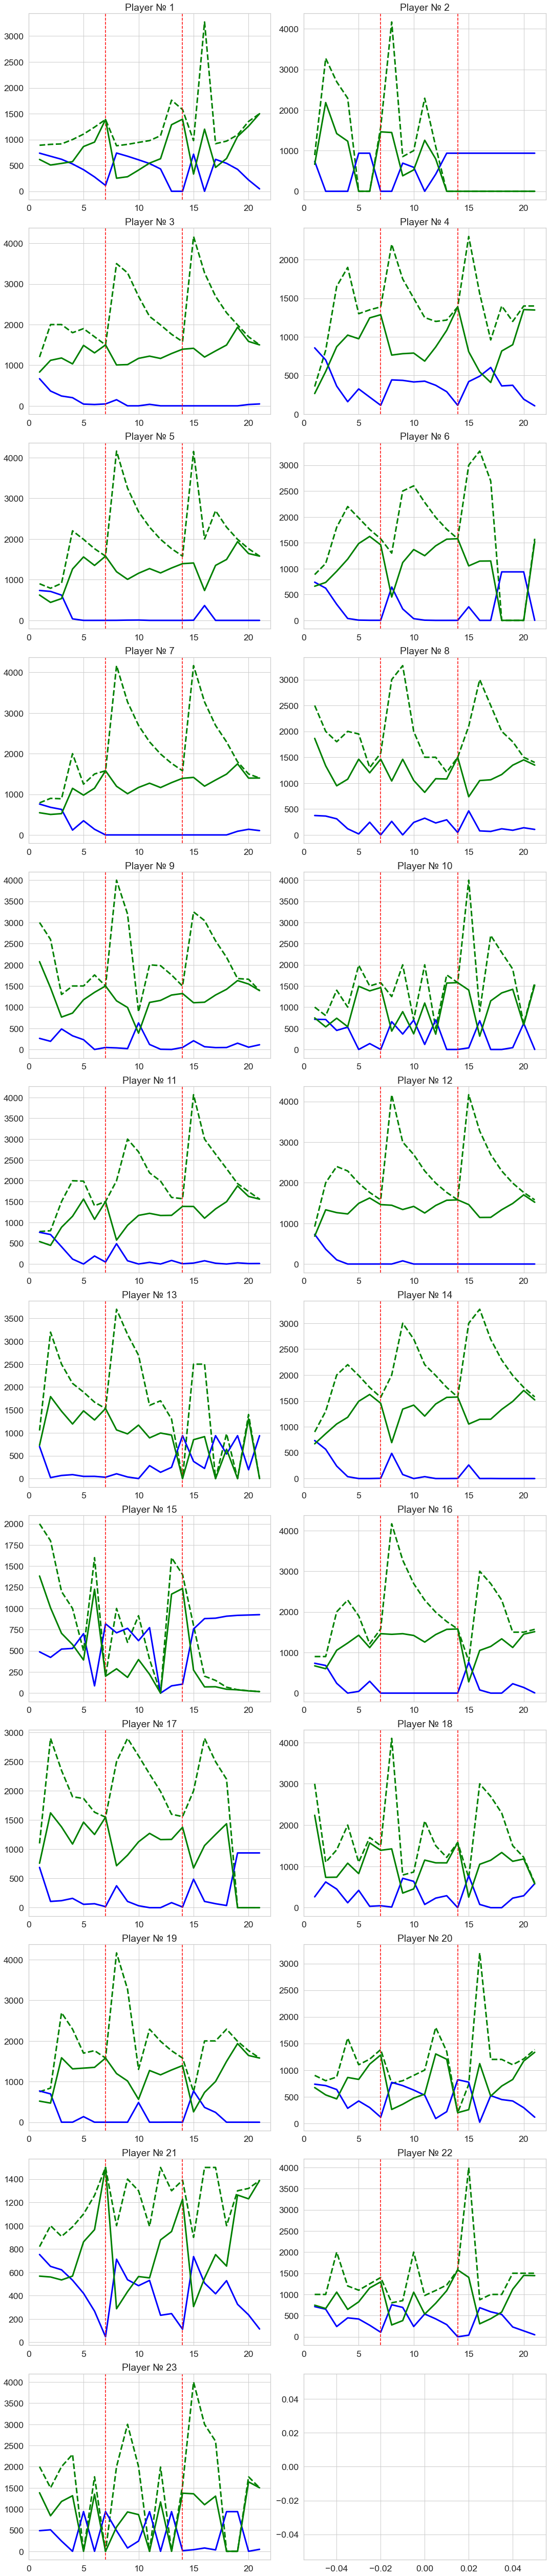

In [19]:
giffen_with_real = 1
fig, ax = plt.subplots(12, 2, figsize=(15, 70))
#plt.axvline (x=7, color='red', linestyle='--') 
#plt.axvline (x=14, color='red', linestyle='--') 

for person_num in range(1, 24):
    person_data = data1.loc[(data1['participant.id_in_session'] == person_num)]
    period = person_data['subsession.round_number'].values
    amount_rice = person_data['player.x_rice'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = person_data['player.x_rice_actual'].values
    
    ax[(person_num-1) // 2, (person_num+1) % 2].plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax[(person_num-1) // 2, (person_num+1) % 2].plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    ax[(person_num-1) // 2, (person_num+1) % 2].axvline(x=7, color='red', linestyle='--') 
    ax[(person_num-1) // 2, (person_num+1) % 2].axvline(x=14, color='red', linestyle='--') 
    
    if giffen_with_real > 0:
        ax[(person_num-1) // 2, (person_num+1) % 2].plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax[(person_num-1) // 2, (person_num+1) % 2].set_title(label = 'Player № {0}'.format(person_num))
    #plt.legend(loc = 1)
    plt.tight_layout()
    plt.plot()

In [20]:
print(range(1, 24))

range(1, 24)


In [21]:
giffen_with_real = 1
person_data_even = data1.loc[(data1['participant.id_in_session']% 2 == 0)]
person_data_odd = data1.loc[(data1['participant.id_in_session']% 2 == 1)]

g1_even_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                          'round_6', 'round_7', 'round_8', 'round_9', 'round_10', 'round_11', 
                                                          'round_12', 'round_13', 'round_14', 'round_15', 'round_16', 'round_17',
                                                          'round_18', 'round_19', 'round_20', 'round_21'])
g1_even_overall_info.loc[0, 'label'] = 'Average_rice'
g1_even_overall_info.loc[1, 'label'] = 'Average_meat'
g1_even_overall_info.loc[2, 'label'] = 'Price_rice'
g1_even_overall_info.loc[3, 'label'] = 'Price_meat'
g1_even_overall_info.loc[4, 'label'] = person_data_even.iloc[0:23]['participant.label'].values
g1_even_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 22):
    period_even_data1 = person_data_even.loc[(person_data_even['subsession.round_number'] == round_num)]

    g1_even_overall_info.iloc[0, round_num] = GetAverageInfo(period_even_data1, round_num)[0] 
    g1_even_overall_info.iloc[1, round_num] = GetAverageInfo(period_even_data1, round_num)[1] 
    g1_even_overall_info.iloc[2, round_num] = GetAverageInfo(period_even_data1, round_num)[2] 
    g1_even_overall_info.iloc[3, round_num] = GetAverageInfo(period_even_data1, round_num)[3]
    g1_even_overall_info.iloc[4, round_num] = period_even_data1['player.payoff'].values
    g1_even_overall_info.iloc[5, round_num] = GetAverageInfo(period_even_data1, round_num)[4]

g1_odd_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                          'round_6', 'round_7', 'round_8', 'round_9', 'round_10', 'round_11', 
                                                          'round_12', 'round_13', 'round_14', 'round_15', 'round_16', 'round_17',
                                                          'round_18', 'round_19', 'round_20', 'round_21'])
g1_odd_overall_info.loc[0, 'label'] = 'Average_rice'
g1_odd_overall_info.loc[1, 'label'] = 'Average_meat'
g1_odd_overall_info.loc[2, 'label'] = 'Price_rice'
g1_odd_overall_info.loc[3, 'label'] = 'Price_meat'
g1_odd_overall_info.loc[4, 'label'] = person_data_odd.iloc[0:23]['participant.label'].values
g1_odd_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 22):
    period_odd_data1 = person_data_odd.loc[(person_data_odd['subsession.round_number'] == round_num)]

    g1_odd_overall_info.iloc[0, round_num] = GetAverageInfo(period_odd_data1, round_num)[0] 
    g1_odd_overall_info.iloc[1, round_num] = GetAverageInfo(period_odd_data1, round_num)[1] 
    g1_odd_overall_info.iloc[2, round_num] = GetAverageInfo(period_odd_data1, round_num)[2] 
    g1_odd_overall_info.iloc[3, round_num] = GetAverageInfo(period_odd_data1, round_num)[3]
    g1_odd_overall_info.iloc[4, round_num] = period_odd_data1['player.payoff'].values
    g1_odd_overall_info.iloc[5, round_num] = GetAverageInfo(period_odd_data1, round_num)[4]

In [22]:
person_data_odd

participant.id_in_session participant.code  participant.label  \
0                            1         51cwhucp                NaN   
2                            3         vzxwemga                NaN   
4                            5         27jvi6sv                NaN   
6                            7         pb5mdaap                NaN   
8                            9         99gvqzyp                NaN   
..                         ...              ...                ...   
474                         15         sklamjh1                NaN   
476                         17         x5iz2htp                NaN   
478                         19         2ho9g6ug                NaN   
480                         21         adyzbrjs                NaN   
482                         23         s20ny0ya                NaN   

     participant._is_bot  participant._index_in_pages  \
0                      0                          108   
2                      0                          108   
4                      0                          108   
6                      0                          108   
8                      0                          108   
..                   ...                          ...   
474                    0                          108   
476                    0                          108   
478                    0                          108   
480                    0                          108   
482                    0                          108   

     participant._max_page_index participant._current_app_name  \
0                            108                       p_final   
2                            108                       p_final   
4                            108                       p_final   
6                            108                       p_final   
8                            108                       p_final   
..                           ...                           ...   
474                          108                       p_final   
476                          108                       p_final   
478                          108                       p_final   
480                          108                       p_final   
482                          108                       p_final   

    participant._current_page_name participant.time_started_utc  \
0                          Results   2023-05-05 14:29:49.706161   
2                          Results   2023-05-05 14:29:53.440759   
4                          Results   2023-05-05 14:29:53.913386   
6                          Results   2023-05-05 14:29:54.699250   
8                          Results   2023-05-05 14:29:55.431719   
..                             ...                          ...   
474                        Results   2023-05-05 14:29:59.831110   
476                        Results   2023-05-05 14:30:01.154350   
478                        Results   2023-05-05 14:30:04.710696   
480                        Results   2023-05-05 14:30:29.689240   
482                        Results   2023-05-05 14:31:49.482873   

     participant.visited  participant.mturk_worker_id  \
0                      1                          NaN   
2                      1                          NaN   
4                      1                          NaN   
6                      1                          NaN   
8                      1                          NaN   
..                   ...                          ...   
474                    1                          NaN   
476                    1                          NaN   
478                    1                          NaN   
480                    1                          NaN   
482                    1                          NaN   

     participant.mturk_assignment_id  participant.payoff  player.id_in_group  \
0                                NaN              150547                   1   
2                                NaN

[]

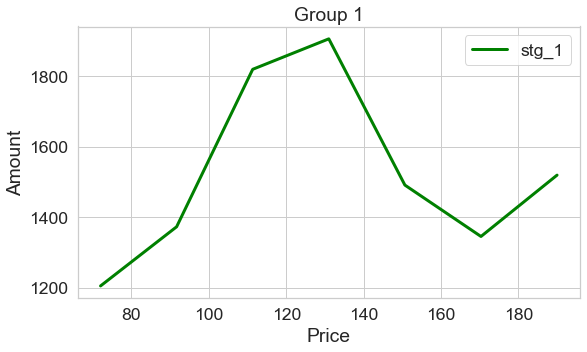

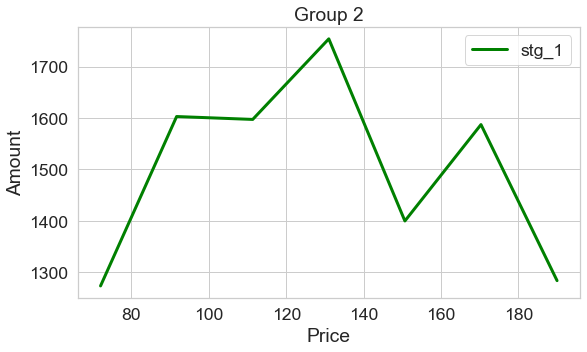

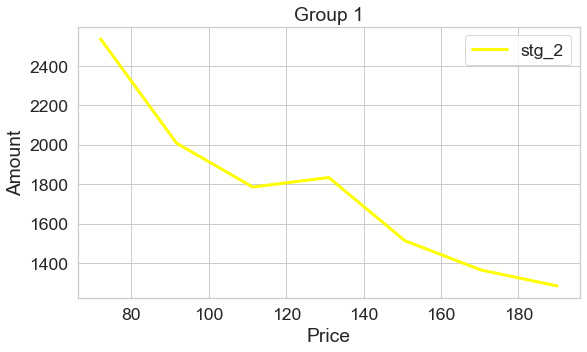

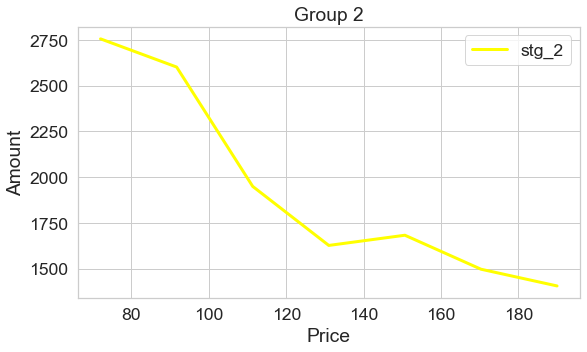

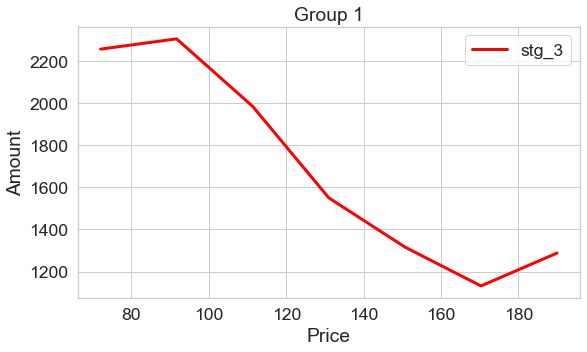

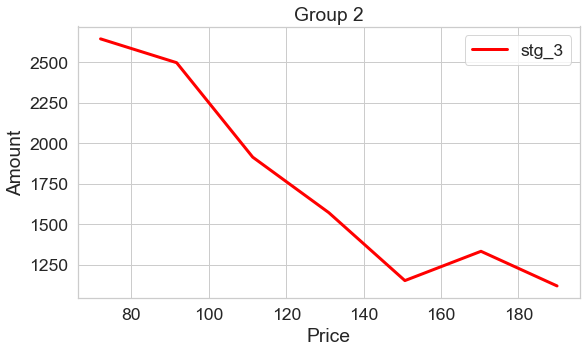

In [23]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g1_even_overall_info.iloc[2, 1:8].values, g1_even_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.plot(g1_even_overall_info.iloc[2, 8:15].values, g1_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
#ax.plot(g1_even_overall_info.iloc[2, 15:22].values, g1_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 1'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g1_odd_overall_info.iloc[2, 1:8].values, g1_odd_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.plot(g1_odd_overall_info.iloc[2, 8:15].values, g1_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
#ax.plot(g1_odd_overall_info.iloc[2, 15:22].values, g1_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 2'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

fig, ax = plt.subplots(1, figsize=(9, 5))

#ax.plot(g1_even_overall_info.iloc[2, 1:8].values, g1_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
ax.plot(g1_even_overall_info.iloc[2, 8:15].values, g1_even_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
#ax.plot(g1_even_overall_info.iloc[2, 15:22].values, g1_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 1'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

fig, ax = plt.subplots(1, figsize=(9, 5))

#ax.plot(g1_odd_overall_info.iloc[2, 1:8].values, g1_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
ax.plot(g1_odd_overall_info.iloc[2, 8:15].values, g1_odd_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
#ax.plot(g1_odd_overall_info.iloc[2, 15:22].values, g1_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 2'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

fig, ax = plt.subplots(1, figsize=(9, 5))

#ax.plot(g1_even_overall_info.iloc[2, 1:8].values, g1_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.plot(g1_even_overall_info.iloc[2, 8:15].values, g1_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
ax.plot(g1_even_overall_info.iloc[2, 15:22].values, g1_even_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 1'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

fig, ax = plt.subplots(1, figsize=(9, 5))

#ax.plot(g1_odd_overall_info.iloc[2, 1:8].values, g1_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.plot(g1_odd_overall_info.iloc[2, 8:15].values, g1_overall_info.iloc[0, 8:15].values,color = 'yellow', linewidth = 3, label = 'stg_2')
ax.plot(g1_odd_overall_info.iloc[2, 15:22].values, g1_odd_overall_info.iloc[0, 15:22].values,color = 'red', linewidth = 3, label = 'stg_3')
#ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Max_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
ax.set_title(label = 'Group 2'.format(person_num))
ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

#  Гиффен 2

In [24]:
data2 = pd.read_excel('Data_2.xlsx', sheet_name = 0)
description2 = pd.read_excel('Data_2.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data2 = data2[usefull_cols].copy()

In [25]:
description2

Data  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0   participant.id_in_session         NaN         NaN         NaN   
1            participant.code         NaN         NaN         NaN   
2           participant.label         NaN         NaN         NaN   
3         participant._is_bot         NaN         NaN         NaN   
4          participant.payoff         NaN         NaN         NaN   
5          player.id_in_group         NaN         NaN         NaN   
6                 player.role         NaN         NaN         NaN   
7               player.payoff         NaN         NaN         NaN   
8               player.x_rice         NaN         NaN         NaN   
9             player.x_rice_d         NaN         NaN         NaN   
10       player.x_rice_actual         NaN         NaN         NaN   
11     player.x_rice_actual_d         NaN         NaN         NaN   
12              player.x_meat         NaN         NaN         NaN   
13            player.max_rice         NaN         NaN         NaN   
14             player.utility         NaN         NaN         NaN   
15           player.utility_d         NaN         NaN         NaN   
16              player.result         NaN         NaN         NaN   
17            player.result_d         NaN         NaN         NaN   
18     group.id_in_subsession         NaN         NaN         NaN   
19            group.rice_left         NaN         NaN         NaN   
20          group.rice_left_d         NaN         NaN         NaN   
21          group.rice_bought         NaN         NaN         NaN   
22               group.p_meat         NaN         NaN         NaN   
23               group.p_rice         NaN         NaN         NaN   
24             group.p_rice_d         NaN         NaN         NaN   
25              group.eq_rice         NaN         NaN         NaN   

                        Таблица с общими результатами  
0                                        Номер игрока  
1                                                 NaN  
2                                                 NaN  
3                                                   -  
4                                       Общий выигрыш  
5   Номер в группе (для данной игры совпадает с но...  
6                                                   -  
7                   Выигрыш в этом периоде - исходный  
8     Количество риса, заявленное на покупку игроком   
9   Количество риса, заявленное на покупку игроком...  
10  Фактически купленное игроком количество риса п...  
11  Фактически купленное игроком количество риса п...  
12                 Количество мяса, купленное игроком  
13  Максимальное количество риса, которое можно пр...  
14                          Функция полезности игрока  
15  Функция полезности игрока [округлённая] (для п...  
16                    Сумма результатов за все раунды  
17  Сумма результатов за все раунды [округлённая],...  
18                                                NaN  
19                               Урожай риса на раунд  
20  Урожай риса на раунд [округлённый] (для показа...  
21          Сумма заявок на покупку риса всех игроков  
22                                       Цена на мясо  
23                        Цена на рис в данном раунде  
24  Цена на рис в данном раунде [округлённая]  (дл...  
25  Равновесие Нэша (оптимальное количество риса, ...

In [26]:
g2_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g2_overall_info.loc[0, 'label'] = 'Average_rice'
g2_overall_info.loc[1, 'label'] = 'Average_meat'
g2_overall_info.loc[2, 'label'] = 'Price_rice'
g2_overall_info.loc[3, 'label'] = 'Price_meat'
g2_overall_info.loc[4, 'label'] = short_data.iloc[0:23]['participant.label'].values
g2_overall_info.loc[5, 'label'] = 'Average_rice'

for round_num in range(1, 8):
    period_data2 = short_data2.loc[(short_data2['subsession.round_number'] == round_num)]

    g2_overall_info.iloc[0, round_num] = GetAverageInfo(period_data2, round_num)[0] 
    g2_overall_info.iloc[1, round_num] = GetAverageInfo(period_data2, round_num)[1] 
    g2_overall_info.iloc[2, round_num] = GetAverageInfo(period_data2, round_num)[2] 
    g2_overall_info.iloc[3, round_num] = GetAverageInfo(period_data2, round_num)[3]
    g2_overall_info.iloc[4, round_num] = period_data2['player.payoff'].values
    g2_overall_info.iloc[5, round_num] = GetAverageInfo(period_data2, round_num)[4]

[]

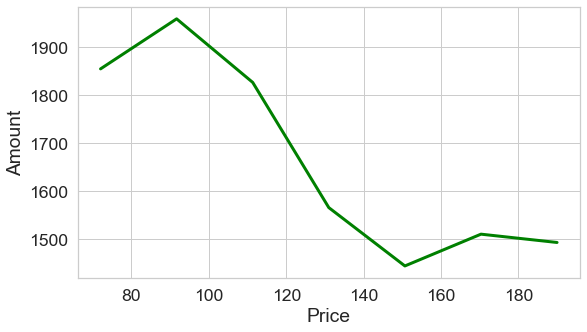

In [27]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
#ax.scatter(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

C:\Users\Natalia\AppData\Local\Temp/ipykernel_13044/1163688653.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(10, 6))


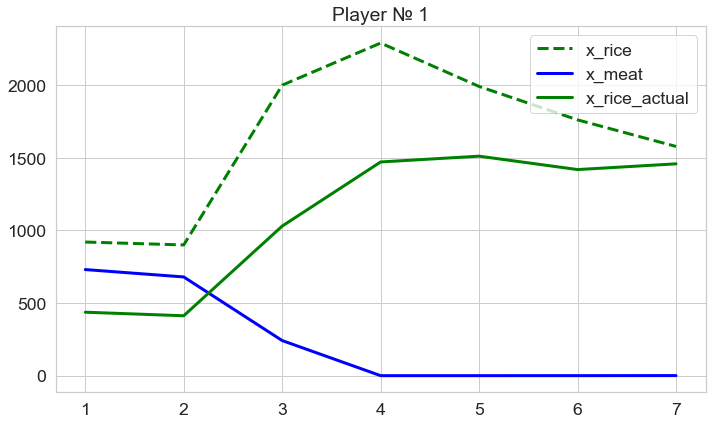

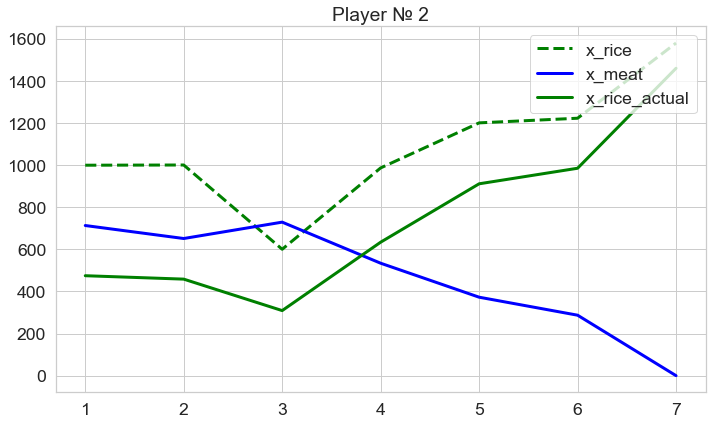

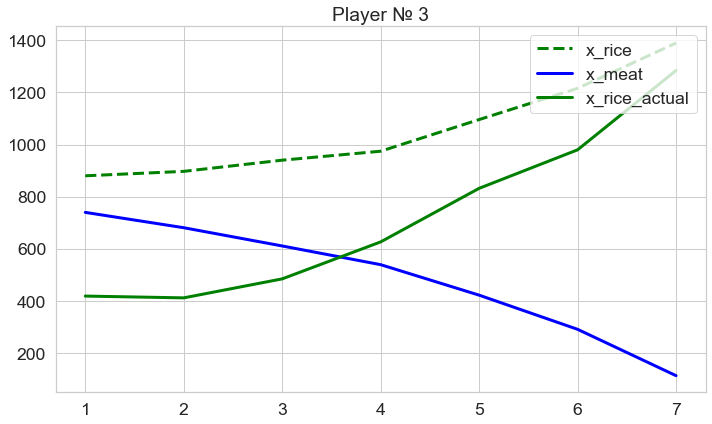

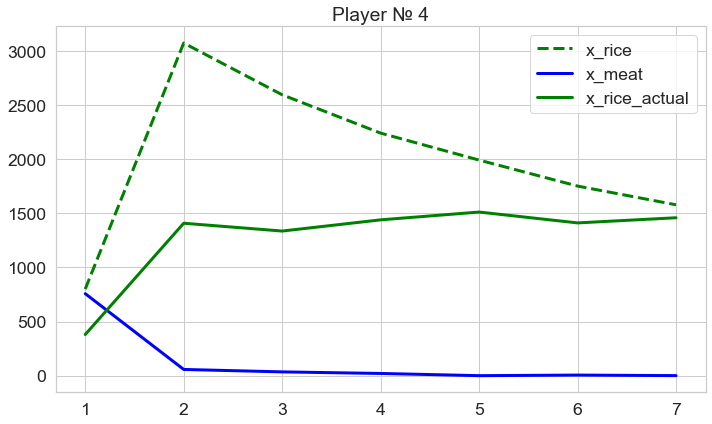

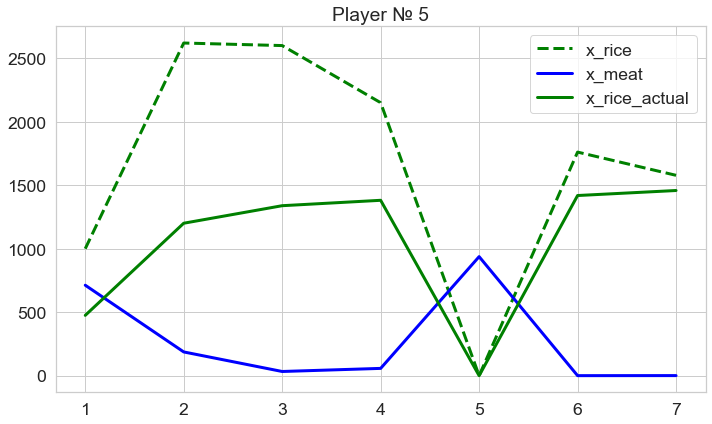

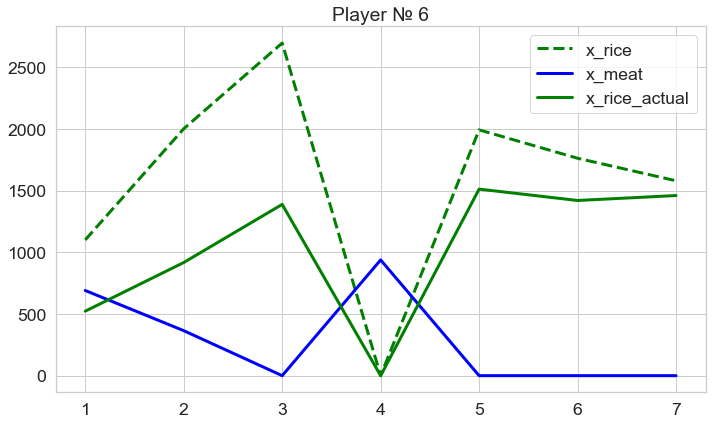

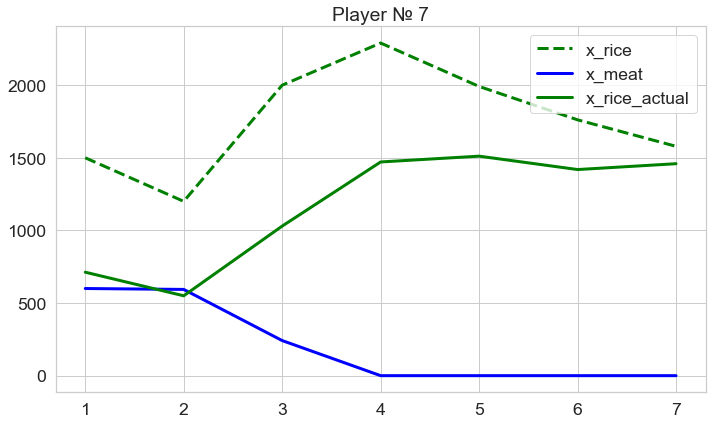

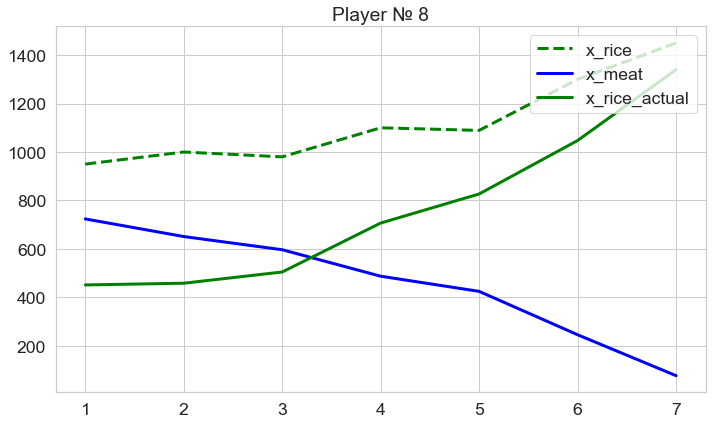

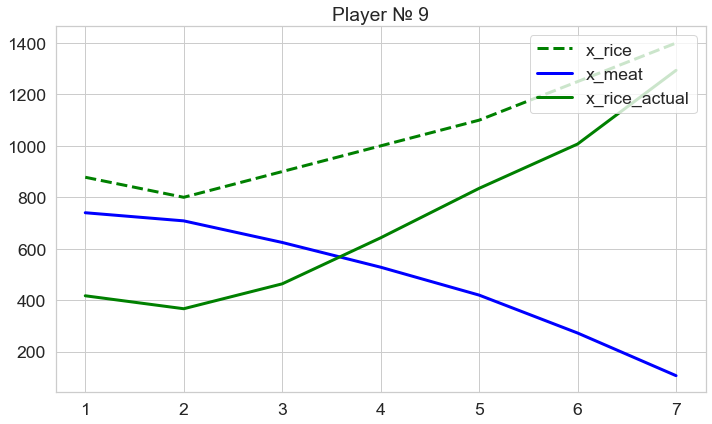

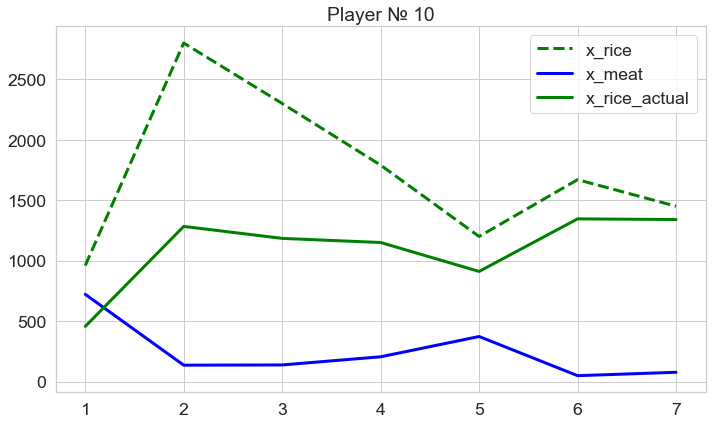

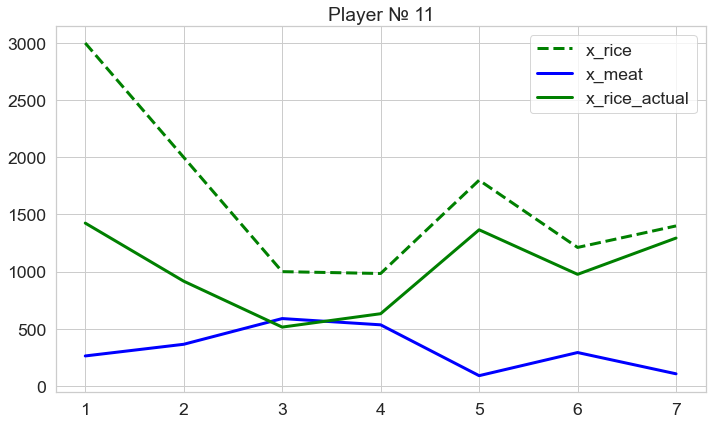

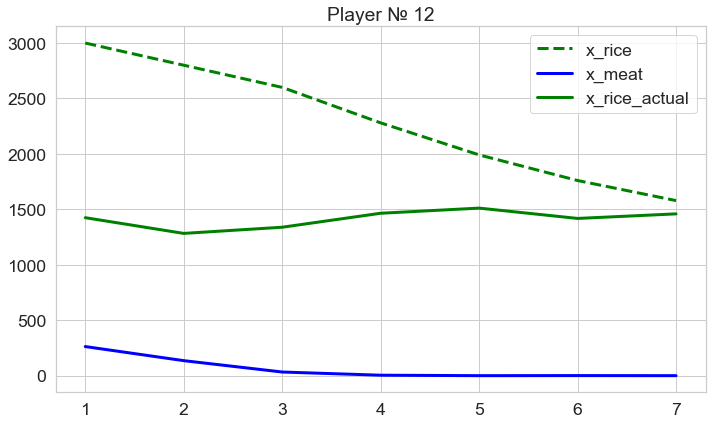

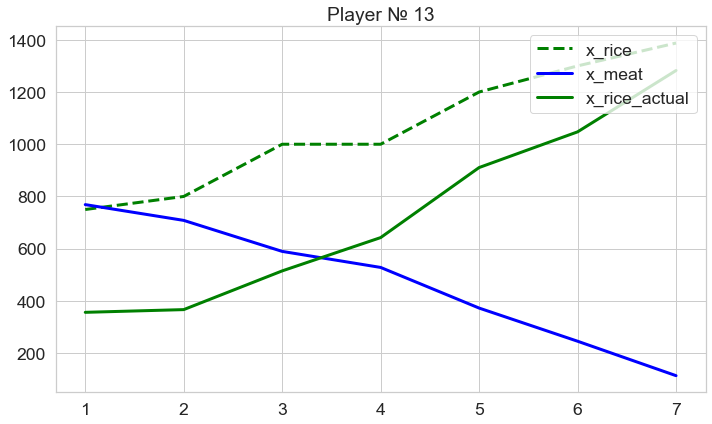

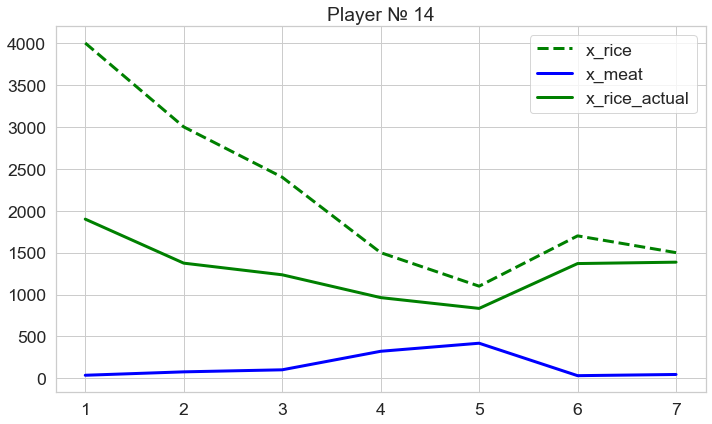

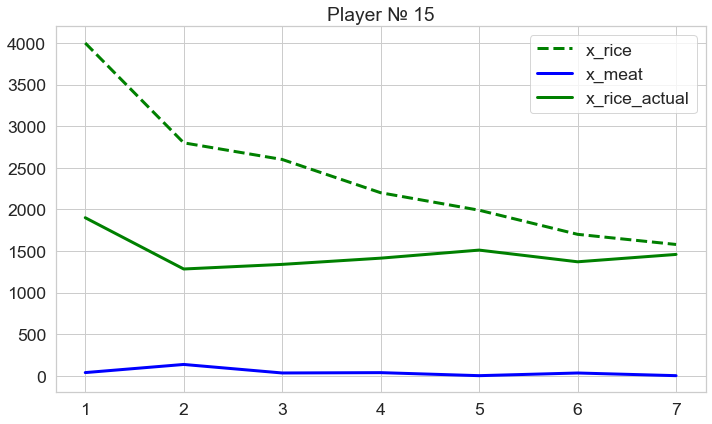

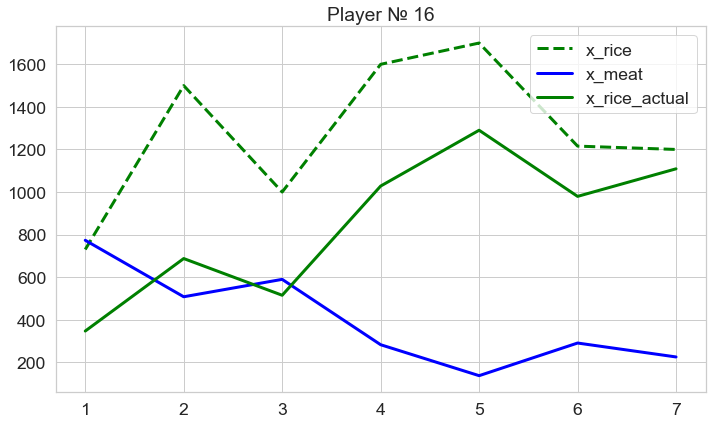

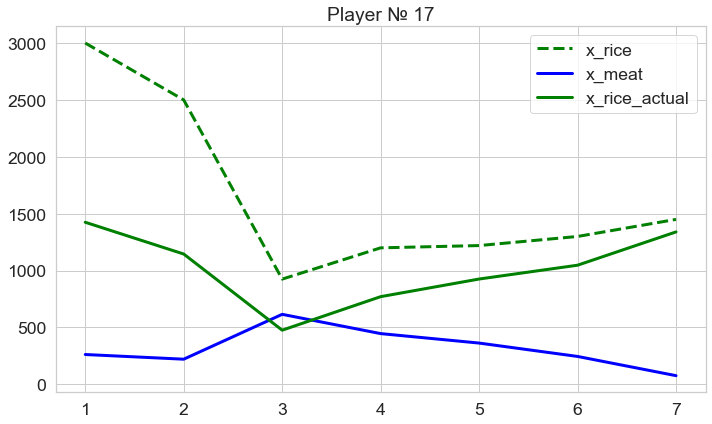

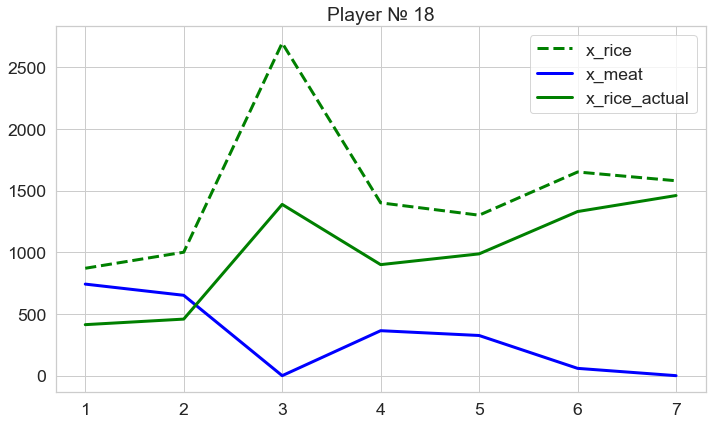

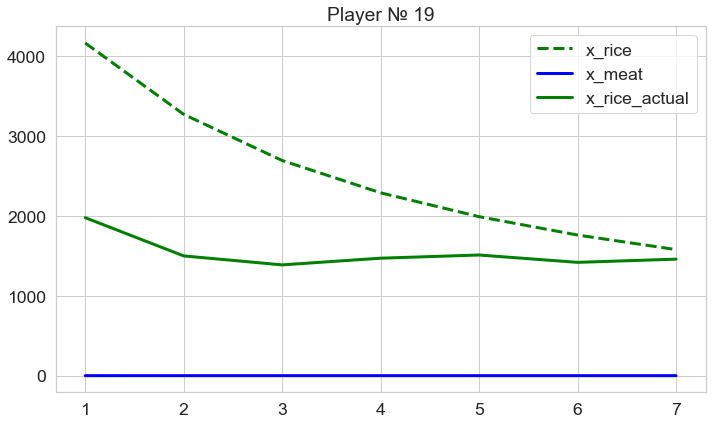

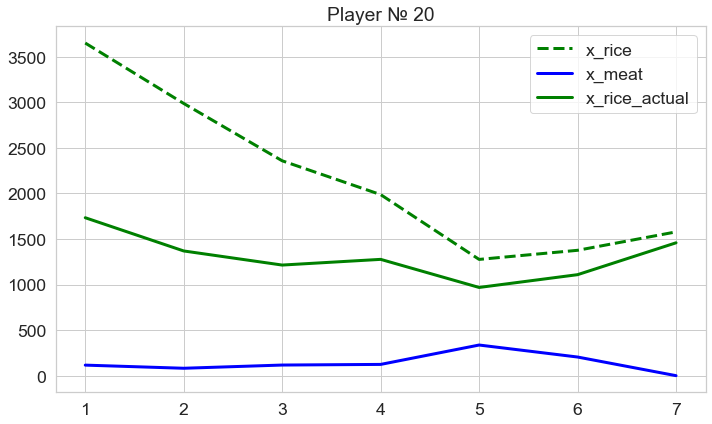

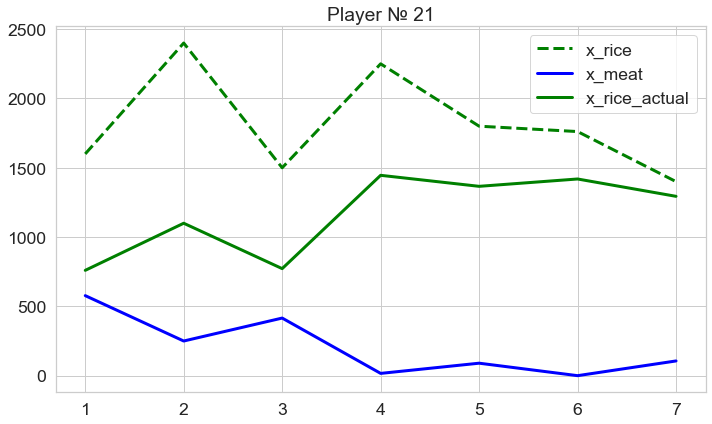

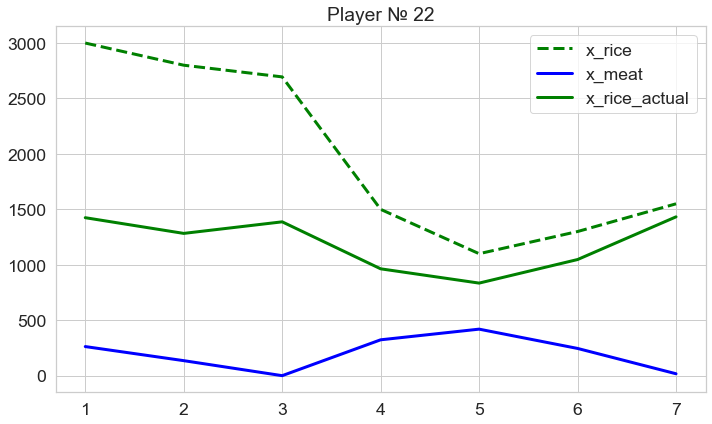

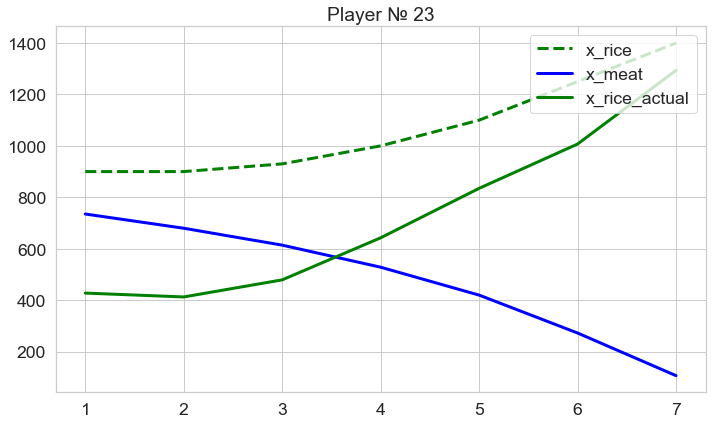

In [28]:
giffen_with_real = 1
for person_num in range(1, 24):
    person_data = data2.loc[(data2['participant.id_in_session'] == person_num)]
    period = person_data['subsession.round_number'].values
    amount_rice = person_data['player.x_rice'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = person_data['player.x_rice_actual'].values
    
   # plt.axvline (x=7, color='red', linestyle='--') 
   # plt.axvline (x=14, color='red', linestyle='--') 
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    #ax.plot(period, utility,color = 'red', linewidth = 3, label = 'utility')
    
    if giffen_with_real > 0:
        ax.plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax.set_title(label = 'Player № {0}'.format(person_num))
    #ax.set_ylabel(ylabel = 'Price')
    plt.legend(loc = 1)
    plt.tight_layout()
    plt.plot()

In [29]:
giffen_with_real = 1
person_data2_even = data2.loc[(data2['participant.id_in_session']% 2 == 0)]
person_data2_odd = data2.loc[(data2['participant.id_in_session']% 2 == 1)]

g2_even_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                          'round_6', 'round_7'])
g2_even_overall_info.loc[0, 'label'] = 'Average_rice'
g2_even_overall_info.loc[1, 'label'] = 'Average_meat'
g2_even_overall_info.loc[2, 'label'] = 'Price_rice'
g2_even_overall_info.loc[3, 'label'] = 'Price_meat'
g2_even_overall_info.loc[4, 'label'] = person_data2_even.iloc[0:23]['participant.label'].values
g2_even_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_even_data2 = person_data2_even.loc[(person_data2_even['subsession.round_number'] == round_num)]

    g2_even_overall_info.iloc[0, round_num] = GetAverageInfo(period_even_data2, round_num)[0] 
    g2_even_overall_info.iloc[1, round_num] = GetAverageInfo(period_even_data2, round_num)[1] 
    g2_even_overall_info.iloc[2, round_num] = GetAverageInfo(period_even_data2, round_num)[2] 
    g2_even_overall_info.iloc[3, round_num] = GetAverageInfo(period_even_data2, round_num)[3]
    g2_even_overall_info.iloc[4, round_num] = period_even_data2['player.payoff'].values
    g2_even_overall_info.iloc[5, round_num] = GetAverageInfo(period_even_data2, round_num)[4]

g2_odd_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                          'round_6', 'round_7'])
g2_odd_overall_info.loc[0, 'label'] = 'Average_rice'
g2_odd_overall_info.loc[1, 'label'] = 'Average_meat'
g2_odd_overall_info.loc[2, 'label'] = 'Price_rice'
g2_odd_overall_info.loc[3, 'label'] = 'Price_meat'
g2_odd_overall_info.loc[4, 'label'] = person_data2_odd.iloc[0:23]['participant.label'].values
g2_odd_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_odd_data2 = person_data2_odd.loc[(person_data2_odd['subsession.round_number'] == round_num)]

    g2_odd_overall_info.iloc[0, round_num] = GetAverageInfo(period_odd_data2, round_num)[0] 
    g2_odd_overall_info.iloc[1, round_num] = GetAverageInfo(period_odd_data2, round_num)[1] 
    g2_odd_overall_info.iloc[2, round_num] = GetAverageInfo(period_odd_data2, round_num)[2] 
    g2_odd_overall_info.iloc[3, round_num] = GetAverageInfo(period_odd_data2, round_num)[3]
    g2_odd_overall_info.iloc[4, round_num] = period_odd_data2['player.payoff'].values
    g2_odd_overall_info.iloc[5, round_num] = GetAverageInfo(period_odd_data2, round_num)[4]

In [30]:
#fig, ax = plt.subplots(1, figsize=(9, 5))
#ax.plot(g2_even_overall_info.iloc[2, 1:8].values, g2_even_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.set_title(label = 'Group 1'.format(person_num))
#ax.set_ylabel(ylabel = 'Amount')
#ax.set_xlabel(xlabel = 'Price')
#plt.legend(loc = 1)
#plt.plot()

#fig, ax = plt.subplots(1, figsize=(9, 5))
#ax.plot(g2_odd_overall_info.iloc[2, 1:8].values, g2_odd_overall_info.iloc[0, 1:8].values,color = 'green', linewidth = 3, label = 'stg_1')
#ax.set_title(label = 'Group 2'.format(person_num))
#ax.set_ylabel(ylabel = 'Amount')
#ax.set_xlabel(xlabel = 'Price')
#plt.legend(loc = 1)
#plt.plot()

#  Гиффен 3

In [31]:
data3 = pd.read_excel('Data_3.xlsx', sheet_name = 0)
description3 = pd.read_excel('Data_3.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data3 = data3[usefull_cols].copy()

In [32]:
description3

Data  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0   participant.id_in_session         NaN         NaN         NaN   
1            participant.code         NaN         NaN         NaN   
2           participant.label         NaN         NaN         NaN   
3         participant._is_bot         NaN         NaN         NaN   
4          participant.payoff         NaN         NaN         NaN   
5          player.id_in_group         NaN         NaN         NaN   
6                 player.role         NaN         NaN         NaN   
7               player.payoff         NaN         NaN         NaN   
8               player.x_rice         NaN         NaN         NaN   
9             player.x_rice_d         NaN         NaN         NaN   
10        player.x_rice_ate_d         NaN         NaN         NaN   
11       player.x_rice_bought         NaN         NaN         NaN   
12        player.x_rice_saved         NaN         NaN         NaN   
13      player.x_rice_saved_d         NaN         NaN         NaN   
14       player.x_rice_actual         NaN         NaN         NaN   
15     player.x_rice_actual_d         NaN         NaN         NaN   
16              player.x_meat         NaN         NaN         NaN   
17            player.max_rice         NaN         NaN         NaN   
18             player.utility         NaN         NaN         NaN   
19           player.utility_d         NaN         NaN         NaN   
20              player.result         NaN         NaN         NaN   
21            player.result_d         NaN         NaN         NaN   
22     group.id_in_subsession         NaN         NaN         NaN   
23            group.rice_left         NaN         NaN         NaN   
24          group.rice_left_d         NaN         NaN         NaN   
25          group.rice_bought         NaN         NaN         NaN   
26               group.p_meat         NaN         NaN         NaN   
27               group.p_rice         NaN         NaN         NaN   
28             group.p_rice_d         NaN         NaN         NaN   
29              group.eq_rice         NaN         NaN         NaN   

                        Таблица с общими результатами  
0                                        Номер игрока  
1                                                 NaN  
2                                                 NaN  
3                                                   -  
4                                       Общий выигрыш  
5   Номер в группе (для данной игры совпадает с но...  
6                                                   -  
7                   Выигрыш в этом периоде - исходный  
8                                                   -  
9   Количество риса, заявленное на покупку игроком...  
10  Количество риса, съеденное игроком за раунд [о...  
11    Количество риса, заявленное на покупку игроком   
12  Количество риса, имеющееся в запасе на данный ...  
13  Количество риса, имеющееся в запасе на данный ...  
14  Фактически купленное игроком количество риса п...  
15  Фактически купленное игроком количество риса п...  
16                 Количество мяса, купленное игроком  
17  Максимальное количество риса, которое можно пр...  
18                          Функция полезности игрока  
19  Функция полезности игрока [округлённая] (для п...  
20                    Сумма результатов за все раунды  
21  Сумма результатов за все раунды [округлённая],...  
22                                                NaN  
23                               Урожай риса на раунд  
24  Урожай риса на раунд [округлённый] (для показа...  
25          Сумма заявок на покупку риса всех игроков  
26                                       Цена на мясо  
27                        Цена на рис в данном раунде  
28  Цена на рис в данном раунде [округлённая]  (дл...  
29  Равновесие Нэша (оптимальное количество риса, ...

In [33]:
g3_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g3_overall_info.loc[0, 'label'] = 'Average_rice_application'
g3_overall_info.loc[1, 'label'] = 'Average_rice_ate'
g3_overall_info.loc[2, 'label'] = 'Average_rice_bought'
g3_overall_info.loc[3, 'label'] = 'Average_rice_saved'
g3_overall_info.loc[4, 'label'] = short_data3.iloc[0:23]['participant.label'].values
g3_overall_info.loc[5, 'label'] = 'Average_rice_real'
g3_overall_info.loc[6, 'label'] = 'Price_rice'

for round_num in range(1, 8):
    period_data3 = data3.loc[(data3['subsession.round_number'] == round_num)]

    g3_overall_info.iloc[0, round_num] = period_data3['player.x_rice'].mean()
    g3_overall_info.iloc[1, round_num] = period_data3['player.x_rice_ate_d'].mean()
    g3_overall_info.iloc[2, round_num] = period_data3['player.x_rice_bought'].mean() 
    g3_overall_info.iloc[3, round_num] = period_data3['player.x_rice_saved'].mean()
    g3_overall_info.iloc[4, round_num] = period_data3['player.payoff'].values
    g3_overall_info.iloc[5, round_num] = period_data3['player.x_rice_actual'].mean()
    g3_overall_info.iloc[6, round_num] = period_data3['group.p_rice'].mean()

[]

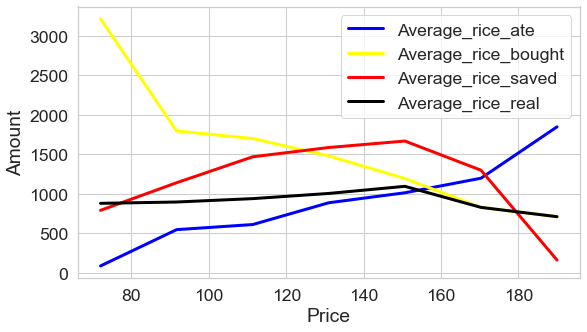

In [34]:
fig, ax = plt.subplots(1, figsize=(9, 5))

#ax.plot(g3_overall_info.iloc[6, 1:].values, g3_overall_info.iloc[0, 1:].values,
#        color = 'green', linewidth = 3, label = 'Average_rice_application')
ax.plot(g3_overall_info.iloc[6, 1:].values, g3_overall_info.iloc[1, 1:].values,
        color = 'blue', linewidth = 3, label = 'Average_rice_ate')
ax.plot(g3_overall_info.iloc[6, 1:].values, g3_overall_info.iloc[2, 1:].values,
        color = 'yellow', linewidth = 3, label = 'Average_rice_bought')
ax.plot(g3_overall_info.iloc[6, 1:].values, g3_overall_info.iloc[3, 1:].values,
        color = 'red', linewidth = 3, label = 'Average_rice_saved')
ax.plot(g3_overall_info.iloc[6, 1:].values, g3_overall_info.iloc[5, 1:].values,
        color = 'black', linewidth = 3, label = 'Average_rice_real')


ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

plt.legend(loc = 1)
plt.plot()

C:\Users\Natalia\AppData\Local\Temp/ipykernel_13044/3866612082.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(10, 5))


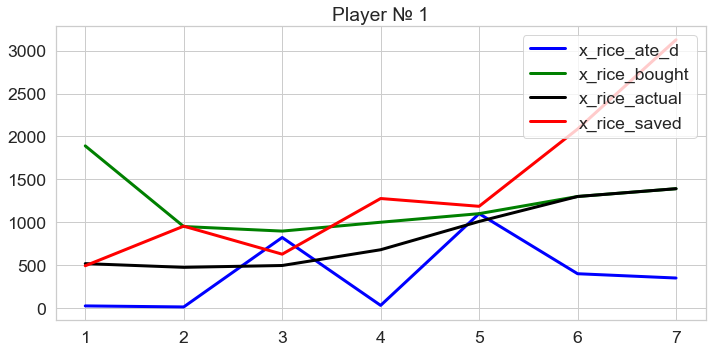

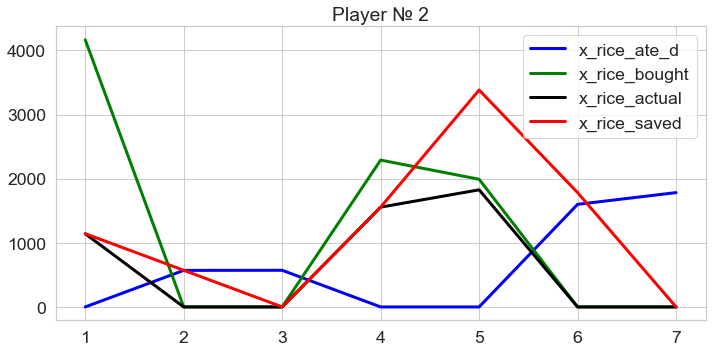

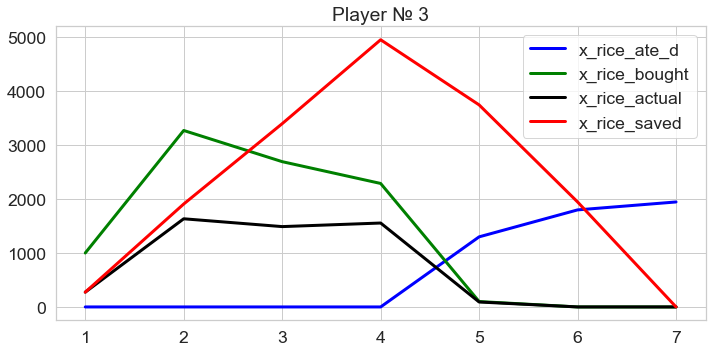

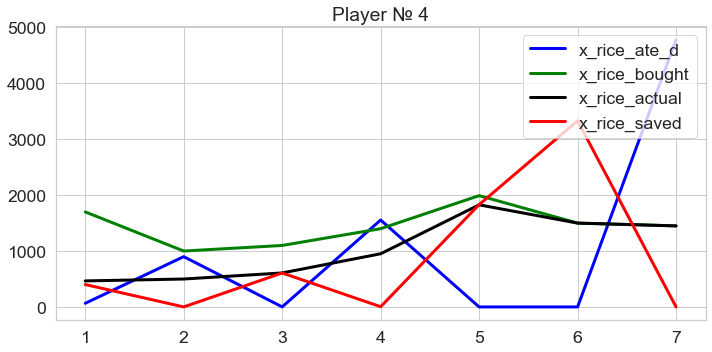

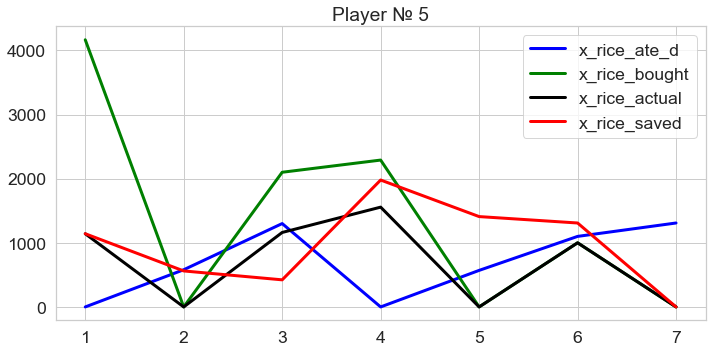

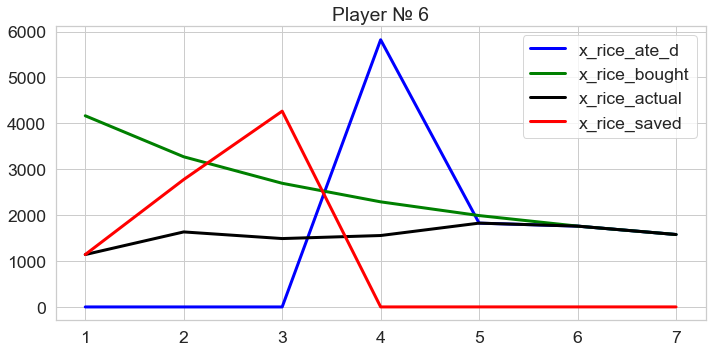

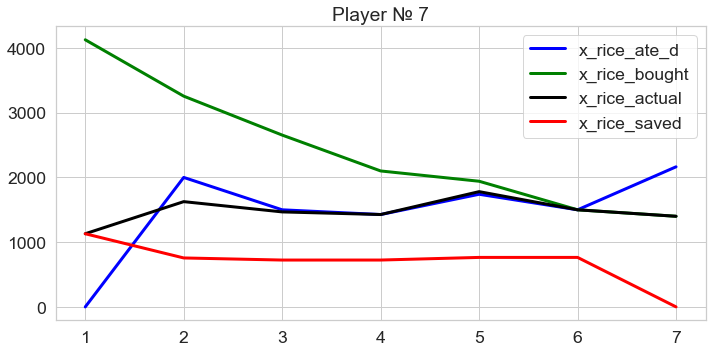

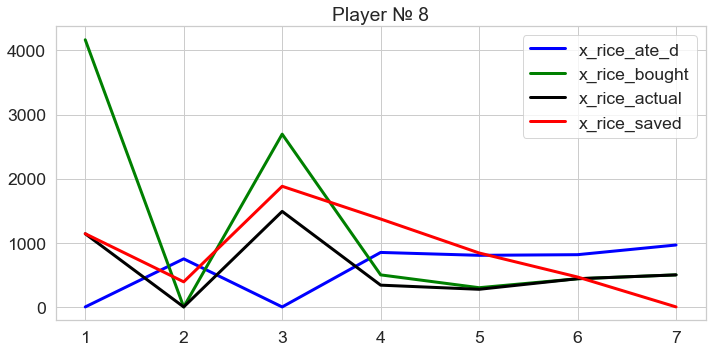

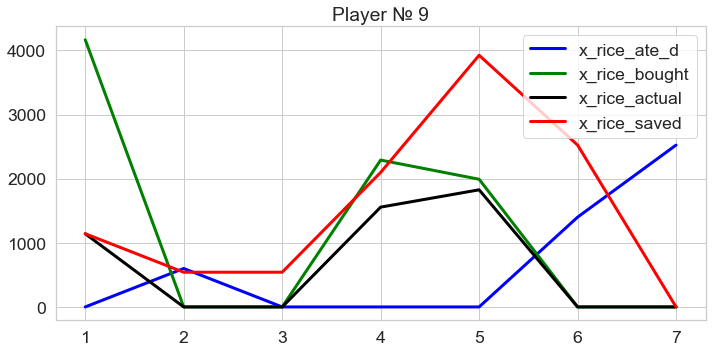

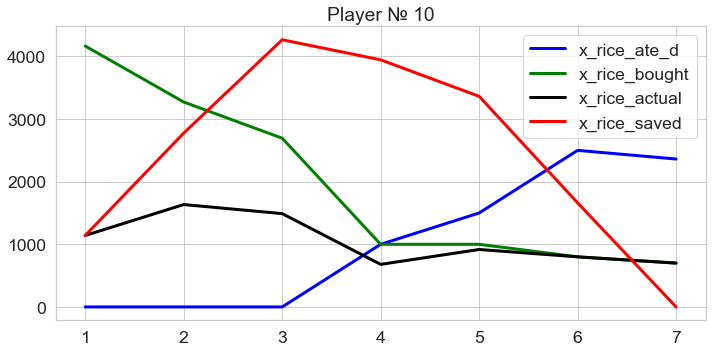

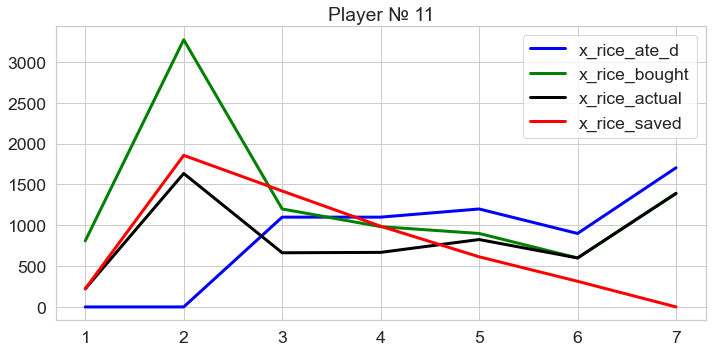

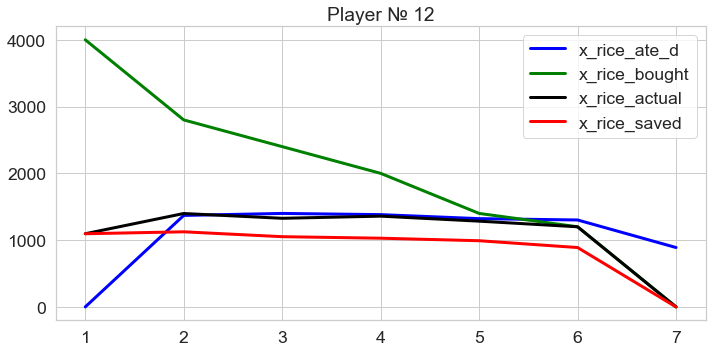

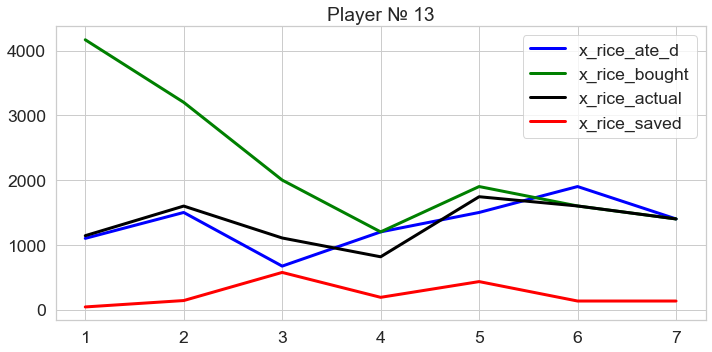

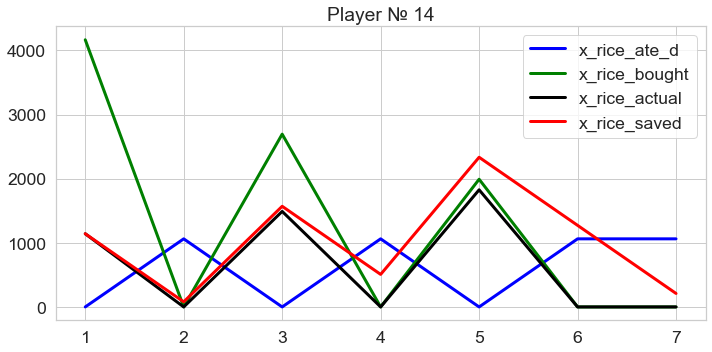

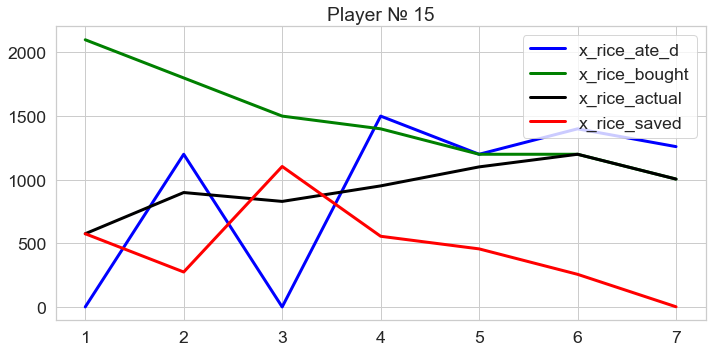

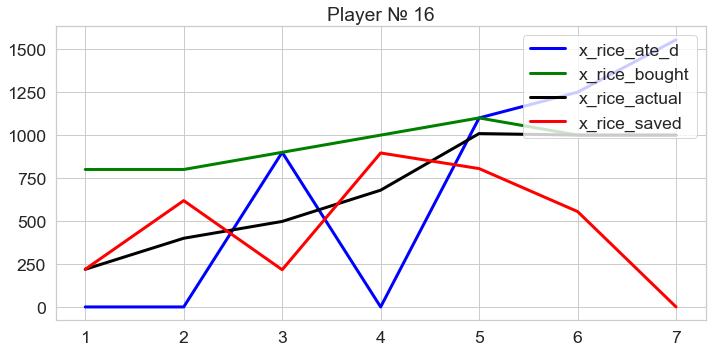

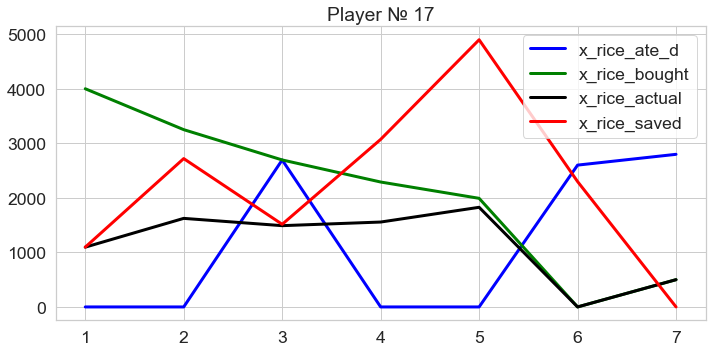

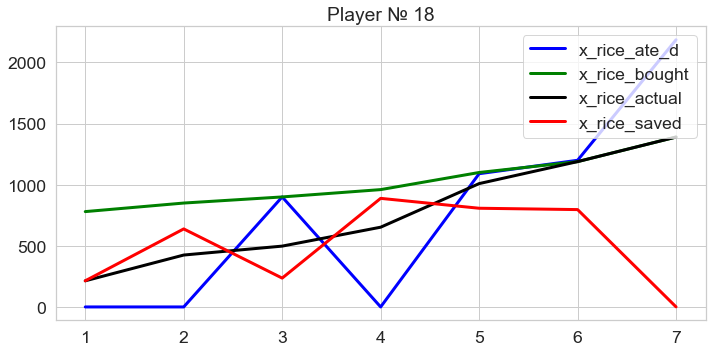

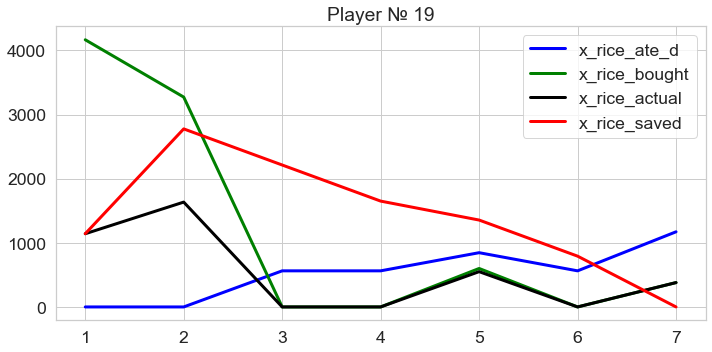

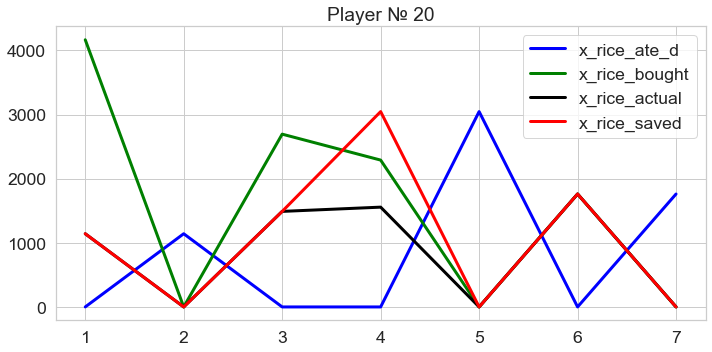

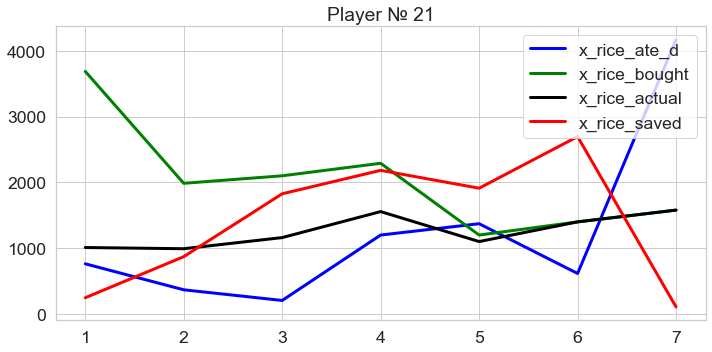

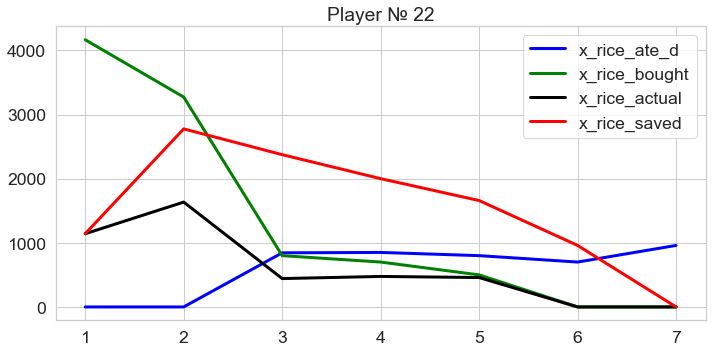

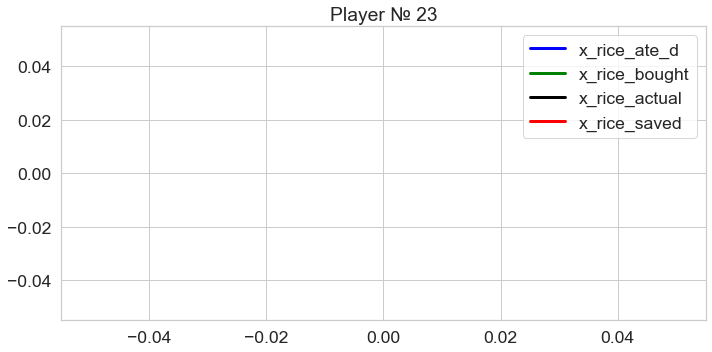

In [42]:
for person_num in range(1, 24):
    person_data3 = data3.loc[(data3['participant.id_in_session'] == person_num)]
    period = person_data3['subsession.round_number'].values
    #x_rice = period_data3['player.x_rice'].values
    x_rice_ate_d = person_data3['player.x_rice_ate_d'].values
    x_rice_bought = person_data3['player.x_rice_bought'].values 
    x_rice_saved = person_data3['player.x_rice_saved'].values
    x_rice_actual = person_data3['player.x_rice_actual'].values
    p_rice = person_data3['group.p_rice'].values
    
    
    fig, ax = plt.subplots(1, figsize=(10, 5))
    #ax.plot(period, x_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, x_rice_ate_d,color = 'blue', linewidth = 3, label = 'x_rice_ate_d')
    ax.plot(period, x_rice_bought,color = 'green', linewidth = 3, label = 'x_rice_bought')
    ax.plot(period, x_rice_actual,color = 'black', linewidth = 3, label = 'x_rice_actual')
    ax.plot(period, x_rice_saved,color = 'red', linewidth = 3, label = 'x_rice_saved')       
    ax.set_title(label = 'Player № {0}'.format(person_num))
    plt.legend(loc = 1)
    plt.tight_layout()
    plt.plot()

#  Гиффен 4

In [38]:
data4 = pd.read_excel('Data_4.xlsx', sheet_name = 0)
description4 = pd.read_excel('Data_4.xlsx', sheet_name = 1)

In [39]:
description4

Data  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0   participant.id_in_session         NaN         NaN         NaN   
1            participant.code         NaN         NaN         NaN   
2           participant.label         NaN         NaN         NaN   
3         participant._is_bot         NaN         NaN         NaN   
4          participant.payoff         NaN         NaN         NaN   
5          player.id_in_group         NaN         NaN         NaN   
6                 player.role         NaN         NaN         NaN   
7               player.payoff         NaN         NaN         NaN   
8                         NaN         NaN         NaN         NaN   
9                         NaN         NaN         NaN         NaN   
10        player.x_rice_ate_d         NaN         NaN         NaN   
11       player.x_rice_bought         NaN         NaN         NaN   
12     player.x_rice_bought_d         NaN         NaN         NaN   
13        player.x_rice_saved         NaN         NaN         NaN   
14      player.x_rice_saved_d         NaN         NaN         NaN   
15              player.x_meat         NaN         NaN         NaN   
16            player.max_rice         NaN         NaN         NaN   
17             player.utility         NaN         NaN         NaN   
18           player.utility_d         NaN         NaN         NaN   
19              player.result         NaN         NaN         NaN   
20            player.result_d         NaN         NaN         NaN   
21     group.id_in_subsession         NaN         NaN         NaN   
22            group.rice_left         NaN         NaN         NaN   
23          group.rice_left_d         NaN         NaN         NaN   
24                        NaN         NaN         NaN         NaN   
25               group.p_meat         NaN         NaN         NaN   
26               group.p_rice         NaN         NaN         NaN   
27             group.p_rice_d         NaN         NaN         NaN   
28              group.eq_rice         NaN         NaN         NaN   

                        Таблица с общими результатами  
0                                        Номер игрока  
1                                                 NaN  
2                                                 NaN  
3                                                   -  
4                                       Общий выигрыш  
5   Номер в группе (для данной игры совпадает с но...  
6                                                   -  
7                   Выигрыш в этом периоде - исходный  
8                                                 NaN  
9                                                 NaN  
10  Количество риса, съеденное игроком за раунд [о...  
11        Количество риса, купленное игроком за раунд  
12  Количество риса, купленное игроком за раунд [о...  
13  Количество риса, имеющееся в запасе на данный ...  
14  Количество риса, имеющееся в запасе на данный ...  
15                 Количество мяса, купленное игроком  
16  Максимальное количество риса, которое можно пр...  
17                          Функция полезности игрока  
18  Функция полезности игрока [округлённая] (для п...  
19                    Сумма результатов за все раунды  
20  Сумма результатов за все раунды [округлённая],...  
21                                                NaN  
22                               Урожай риса на раунд  
23  Урожай риса на раунд [округлённый] (для показа...  
24                                                NaN  
25                                       Цена на мясо  
26                        Цена на рис в данном раунде  
27  Цена на рис в данном раунде [округлённая]  (дл...  
28  Равновесие Нэша (оптимальное количество риса, ...

In [46]:
g4_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g4_overall_info.loc[0, 'label'] = 'Average_rice_application'
g4_overall_info.loc[1, 'label'] = 'Average_rice_ate'
g4_overall_info.loc[2, 'label'] = 'Average_rice_bought'
g4_overall_info.loc[3, 'label'] = 'Average_rice_saved'
g4_overall_info.loc[4, 'label'] = data4.iloc[0:23]['participant.label'].values
g4_overall_info.loc[5, 'label'] = 'Price_rice'

for round_num in range(1, 8):
    period_data4 = data4.loc[(data4['subsession.round_number'] == round_num)]

    g4_overall_info.iloc[0, round_num] = period_data4['player.x_rice'].mean()
    g4_overall_info.iloc[1, round_num] = period_data4['player.x_rice_ate_d'].mean()
    g4_overall_info.iloc[2, round_num] = period_data4['player.x_rice_bought'].mean() 
    g4_overall_info.iloc[3, round_num] = period_data4['player.x_rice_saved'].mean()
    g4_overall_info.iloc[4, round_num] = period_data4['player.payoff'].values
    g4_overall_info.iloc[5, round_num] = period_data4['group.p_rice'].mean()

C:\Users\Natalia\AppData\Local\Temp/ipykernel_13044/1184333509.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(10, 5))


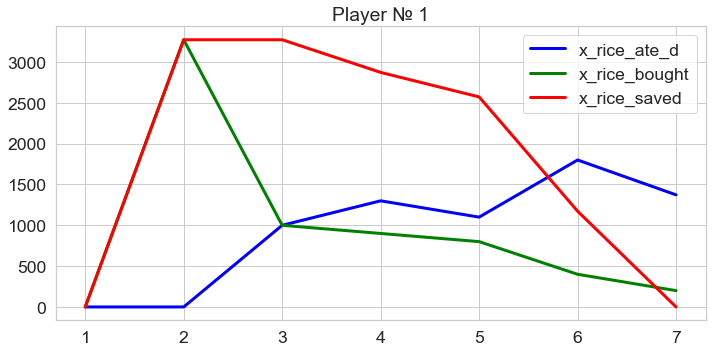

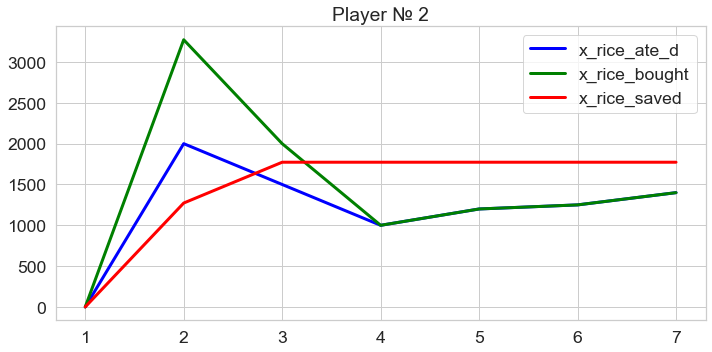

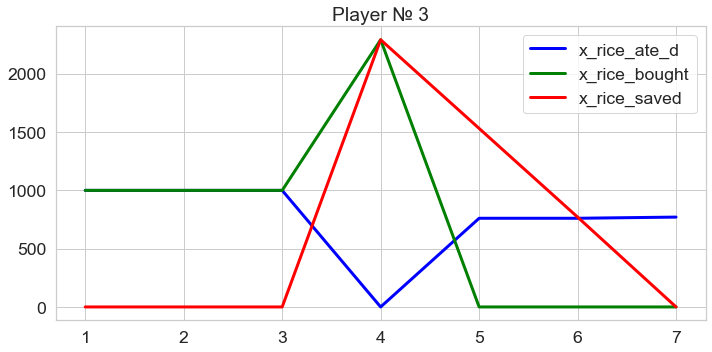

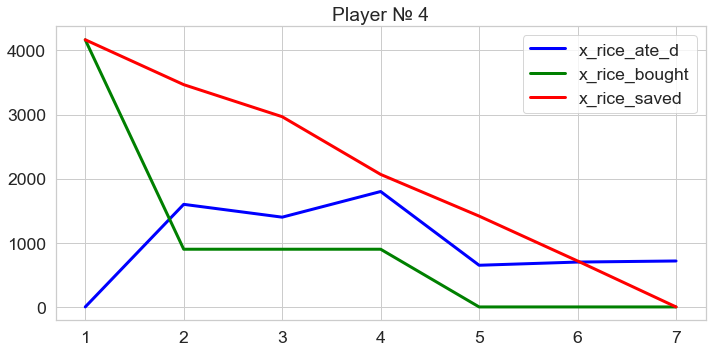

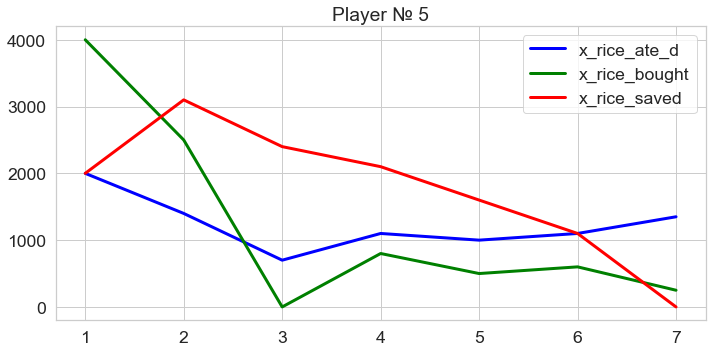

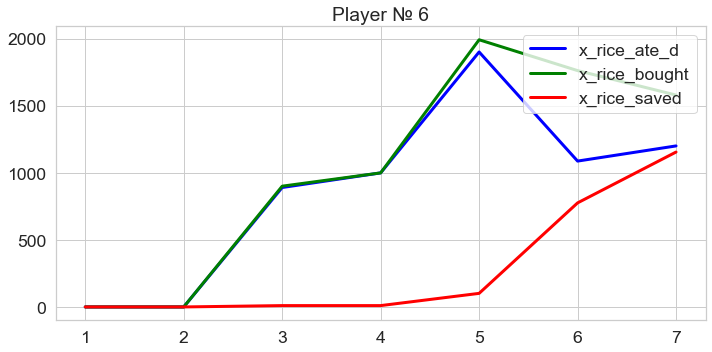

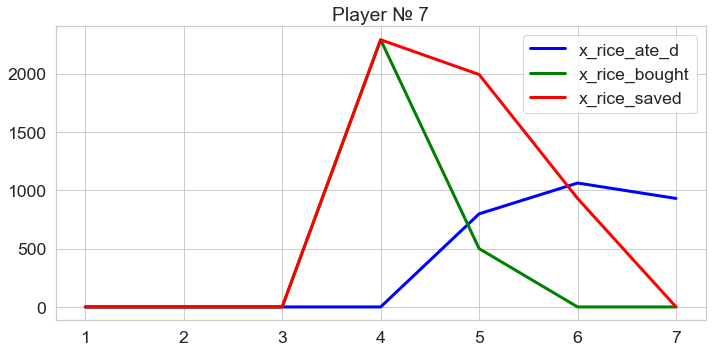

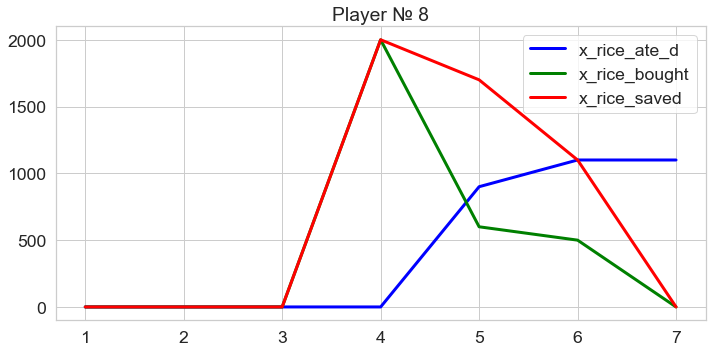

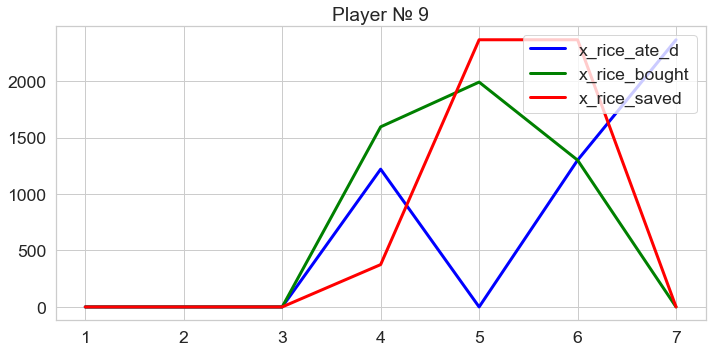

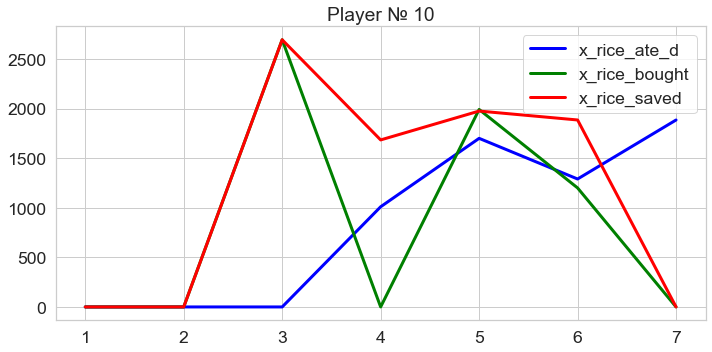

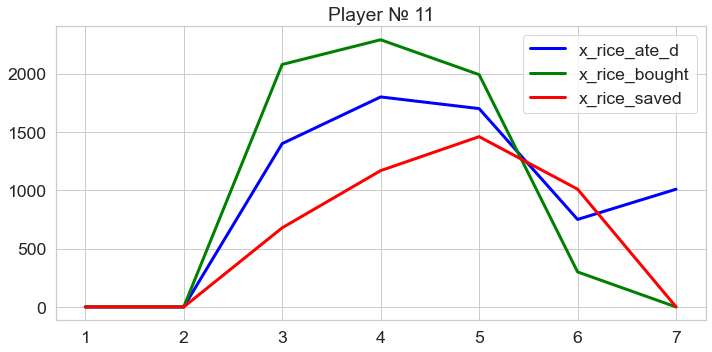

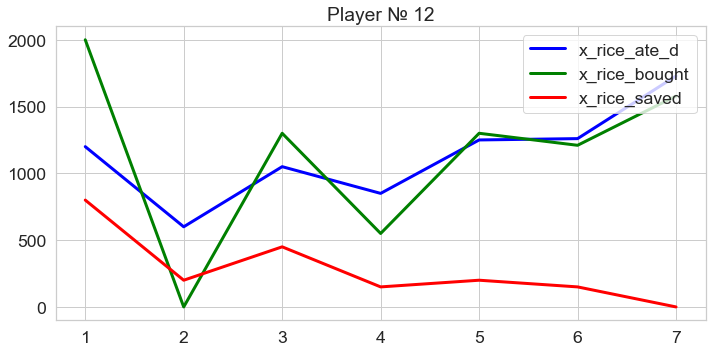

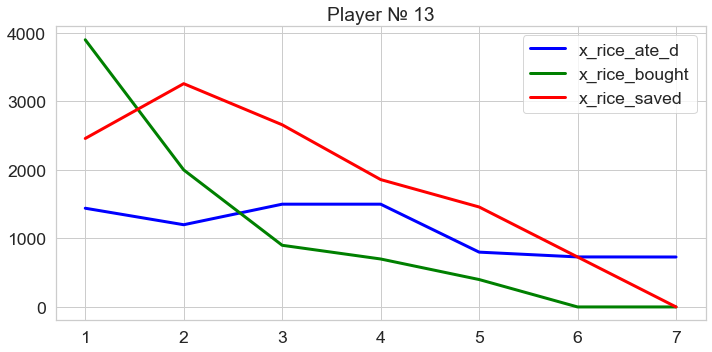

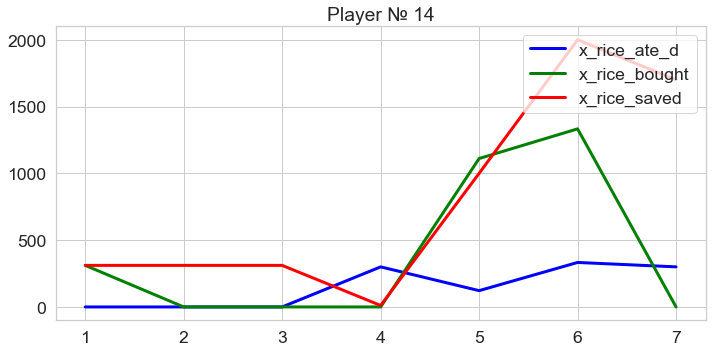

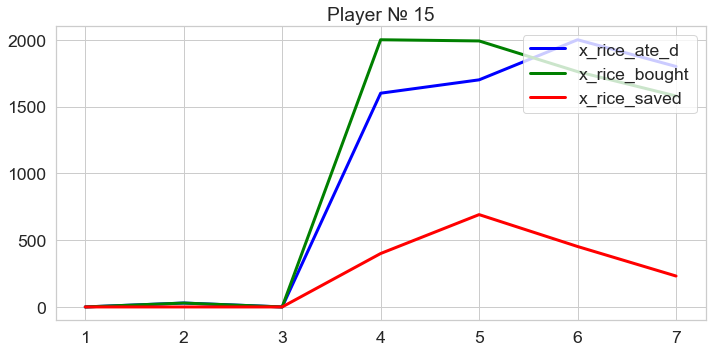

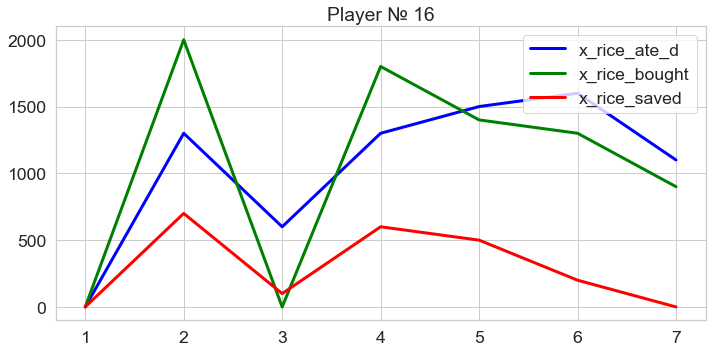

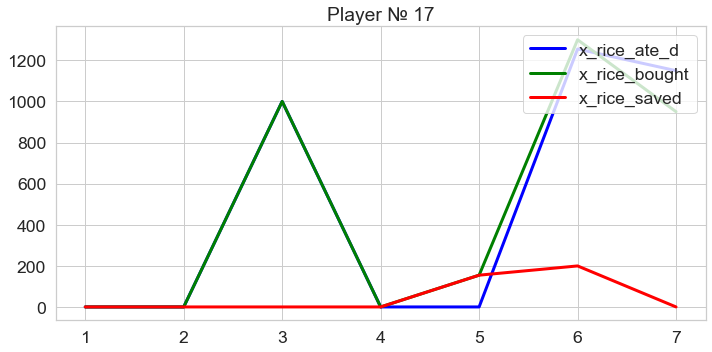

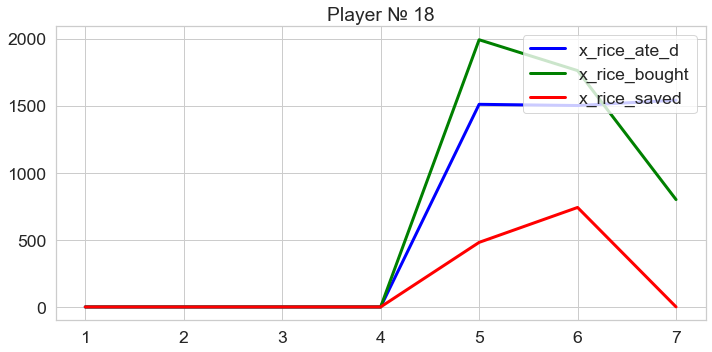

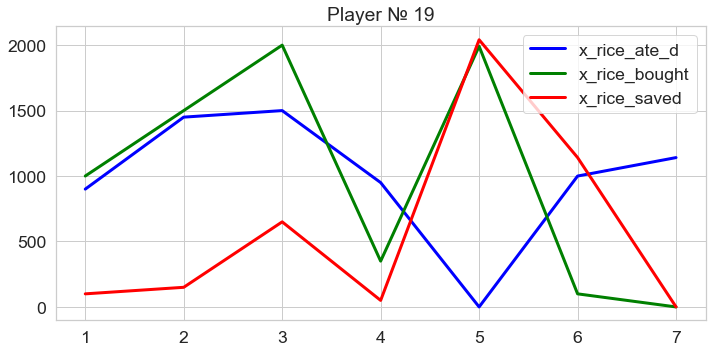

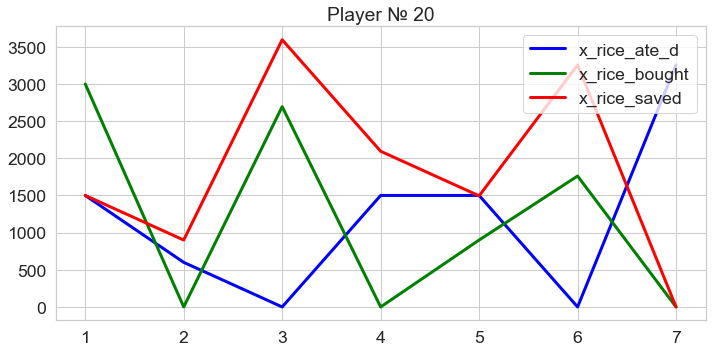

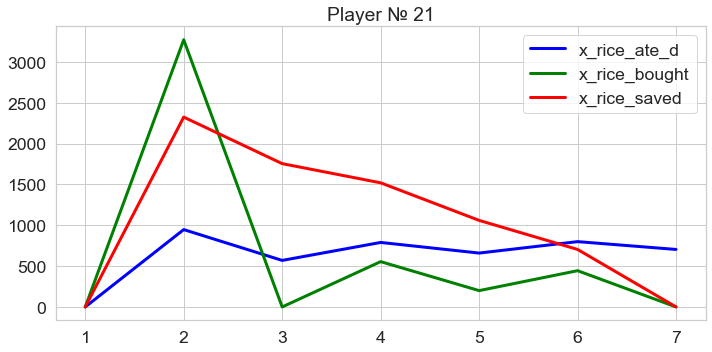

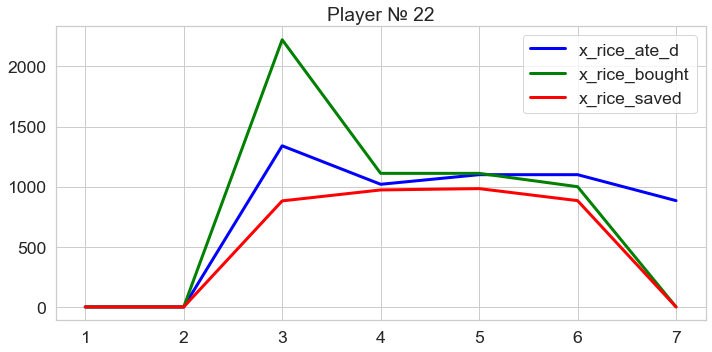

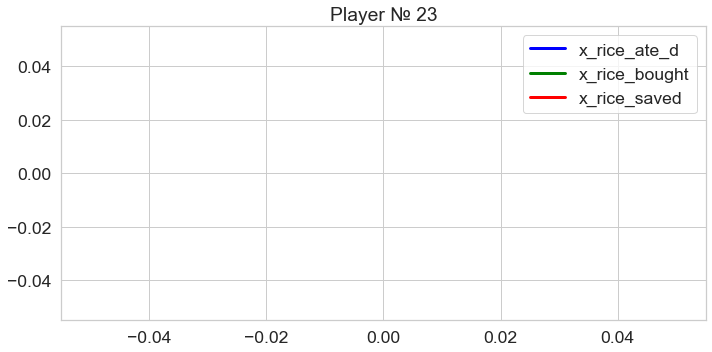

In [47]:
for person_num in range(1, 24):
    person_data4 = data4.loc[(data4['participant.id_in_session'] == person_num)]
    period = person_data4['subsession.round_number'].values
    #x_rice = period_data4['player.x_rice'].values
    x_rice_ate_d = person_data4['player.x_rice_ate_d'].values
    x_rice_bought = person_data4['player.x_rice_bought'].values 
    x_rice_saved = person_data4['player.x_rice_saved'].values
    p_rice = person_data4['group.p_rice'].values
    
    
    fig, ax = plt.subplots(1, figsize=(10, 5))
    #ax.plot(period, x_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, x_rice_ate_d,color = 'blue', linewidth = 3, label = 'x_rice_ate_d')
    ax.plot(period, x_rice_bought,color = 'green', linewidth = 3, label = 'x_rice_bought')
    ax.plot(period, x_rice_saved,color = 'red', linewidth = 3, label = 'x_rice_saved')       
    ax.set_title(label = 'Player № {0}'.format(person_num))
    plt.legend(loc = 1)
    plt.tight_layout()
    plt.plot()